In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns  
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings("ignore")

pd.options.display.max_columns = None

import sqlalchemy as sql
import sqlite3

import random

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (log_loss, fbeta_score, recall_score, confusion_matrix, accuracy_score, 
                             precision_recall_fscore_support, precision_score)

<h2>Load Data </h2>

In [24]:
#getting aw data and storing in a sqlite database]
engine = sql.create_engine("sqlite:///telco.db")
conn = sqlite3.connect('telco.db')
data = pd.read_sql('select * from preprocessed_data', engine)

In [25]:
print(f'num rows: {data.shape[0]} \nnum columns:  {data.shape[1]}')

num rows: 7032 
num columns:  21


In [26]:
sns.set_style("whitegrid")

* The priority is f2 scores so we will find a way to increase our f2 as much as possible

* so we will bring in all our data including categorical ones, then make dummies for it

In [27]:
data.drop('index', axis=1, inplace=True)
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [28]:
# let make coppy of the main data and pre-process the copied one
data['Churn'] = np.where(data.Churn == 'Yes',1,0)
full_data = data.copy()
full_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7028,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7029,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7030,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [29]:
full_data = pd.get_dummies(full_data, drop_first = True)
full_data

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,24,84.80,1990.50,0,1,1,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1
7028,0,72,103.20,7362.90,0,0,1,1,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,1,0,0
7029,0,11,29.60,346.45,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
7030,1,4,74.40,306.60,1,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


* we can take a look at our feature correlation

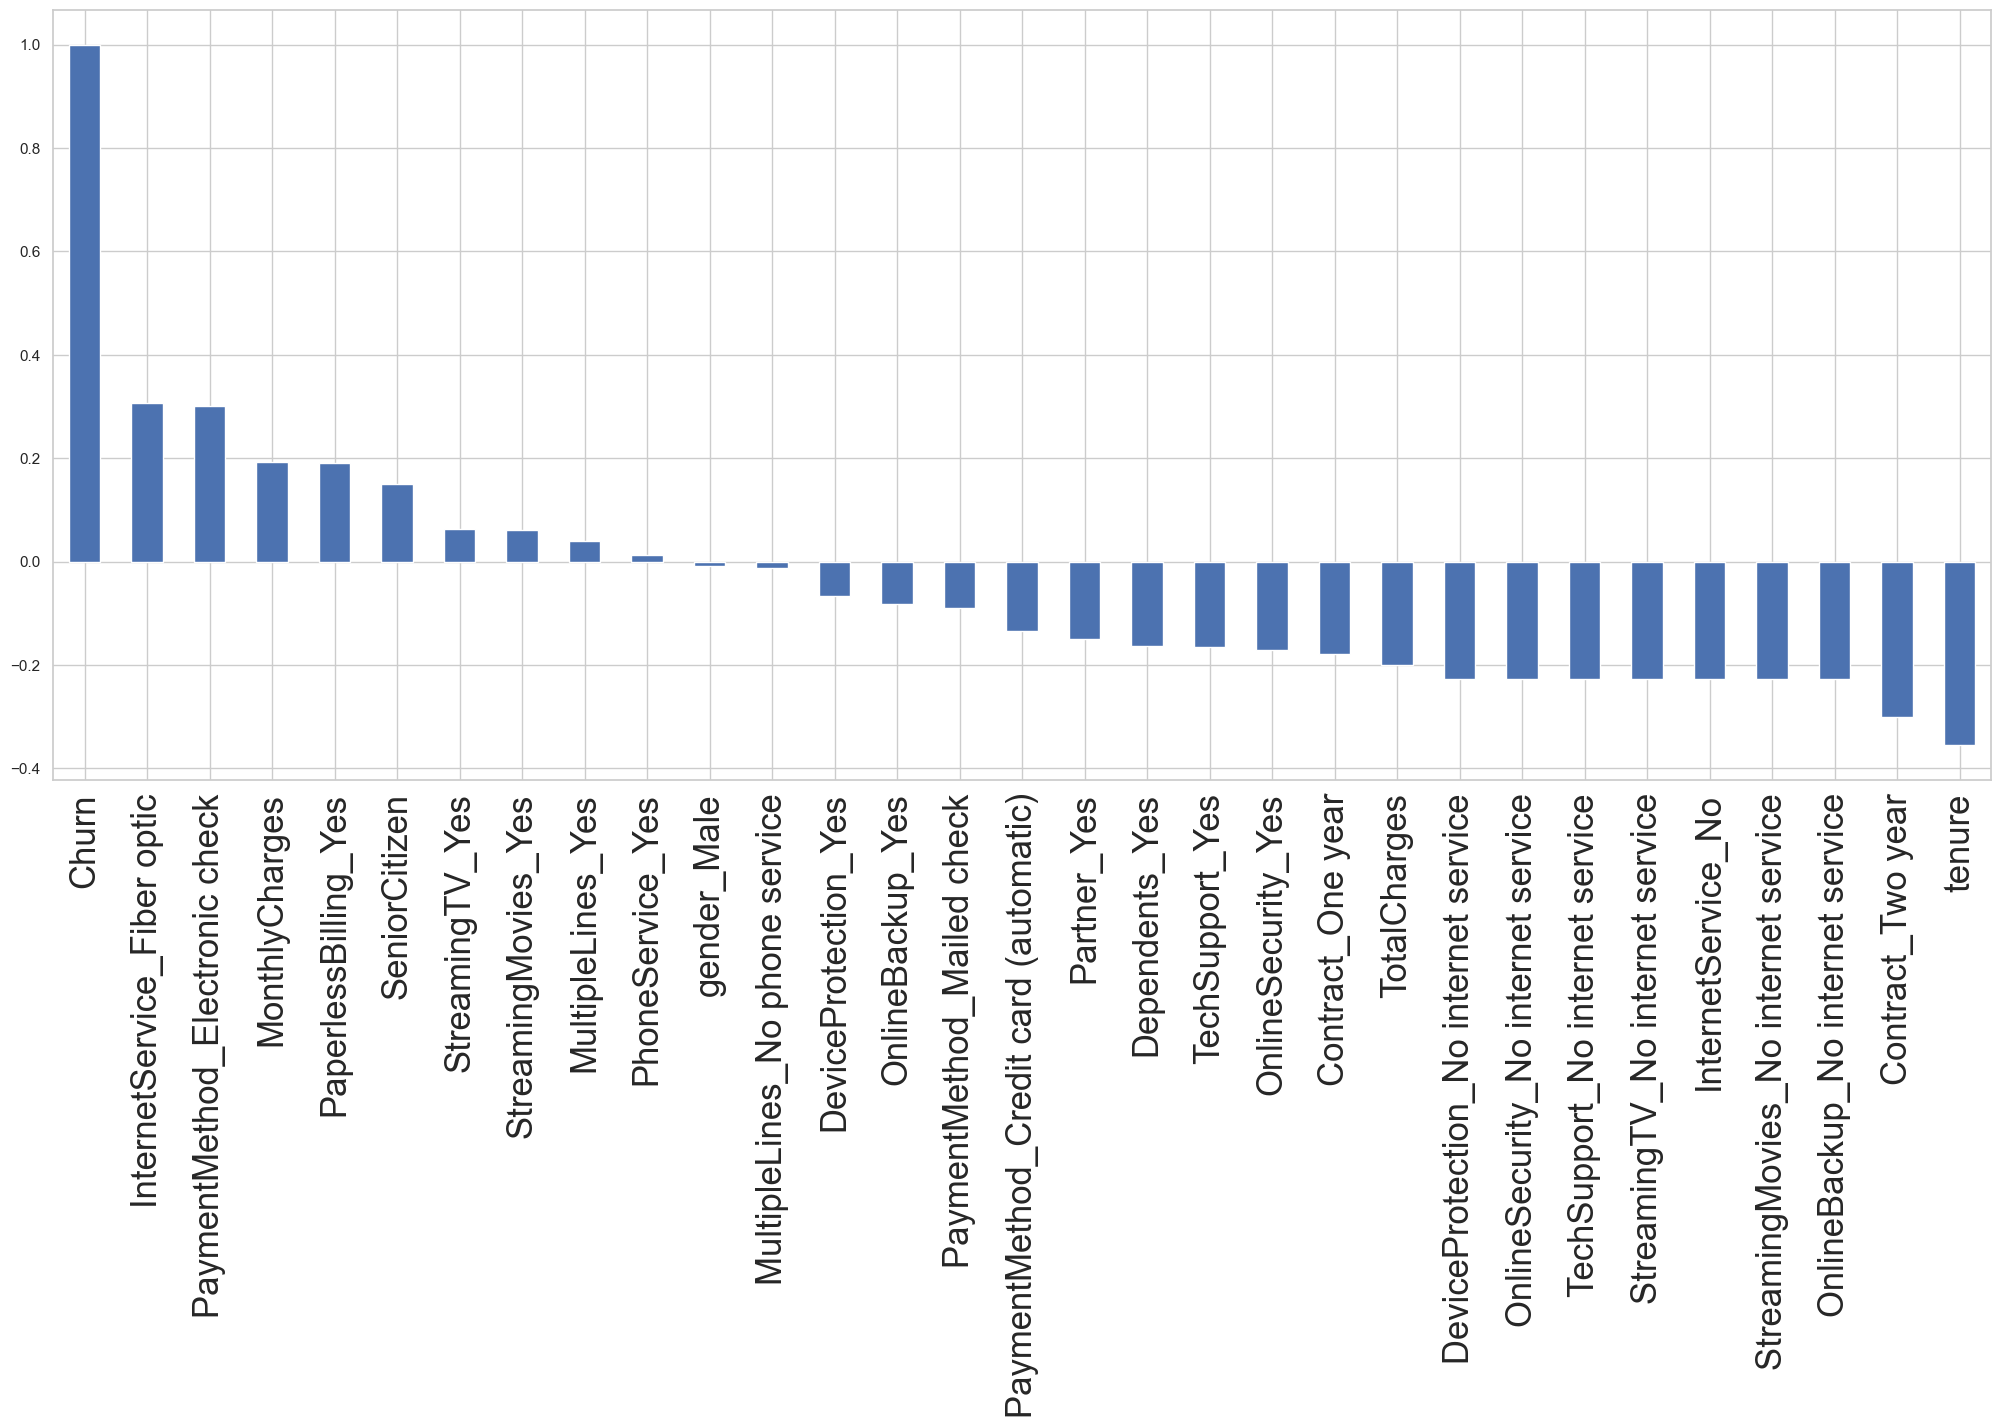

In [30]:

plt.figure(figsize=(25,10))
ax = full_data.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')
plt.xticks(fontsize=25, rotation=90);
# plt.savefig('./pics/corr.png');

In [31]:
full_data.shape

(7032, 31)

* ##  Now lets start modeling with this data

In [32]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold

In [33]:
X = full_data.drop('Churn', axis=1)
y = full_data["Churn"]

In [34]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train, test_size=.2, random_state=42)

In [35]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((4500, 30), (4500,), (1125, 30), (1125,), (1407, 30), (1407,))

In [36]:
clf = LogisticRegression(C=100)
clf.fit(x_train, y_train)
val_preds= clf.predict(x_val)


print(f'Val Recall score: {recall_score(y_val, val_preds)} ')
print(f'Val F2 score: {fbeta_score(y_val, val_preds,beta=2)} ')
print('')
print(' val confusion_matrix:')
confusion_matrix(y_val, val_preds)

Val Recall score: 0.5346534653465347 
Val F2 score: 0.5547945205479452 

 val confusion_matrix:


array([[736,  86],
       [141, 162]])

In [37]:
accuracy_score(y_val, val_preds)

0.7982222222222223

### Lets do the same with CV

In [38]:
c_list = np.linspace(.10,.50,1000)

kf = KFold(n_splits=5, random_state=0, shuffle=True)

clf_cv = LogisticRegressionCV(cv=kf, random_state=42, Cs=c_list)
clf_cv.fit(x_train, y_train)
cv_preds= clf_cv.predict(x_val)


print(f'Val Recall score: {recall_score(y_val, cv_preds)} ')
print(f'Val F2 score: {fbeta_score(y_val, cv_preds,beta=2)} ')
print('')
print(' val confusion_matrix:')
confusion_matrix(y_val, cv_preds)

Val Recall score: 0.5544554455445545 
Val F2 score: 0.5749486652977414 

 val confusion_matrix:


array([[741,  81],
       [135, 168]])

In [39]:
accuracy_score(y_val, cv_preds)

0.808

In [40]:
clf_cv.C_

array([0.1004004])

* #### So we can see above that there is a slight improvement from regular to cv but not too much

* ### now we can focus on some class imbalance techniques

  1. Lests start with threshold adjustment 


In [41]:
# packages needed for this notebook: MLXTEND, IMBALANCED-LEARN
# !pip install mlxtend
# !conda install -c conda-forge imbalanced-learn -y

Logistic Regression Model best F2 score 0.772 at prob decision threshold >= 0.190


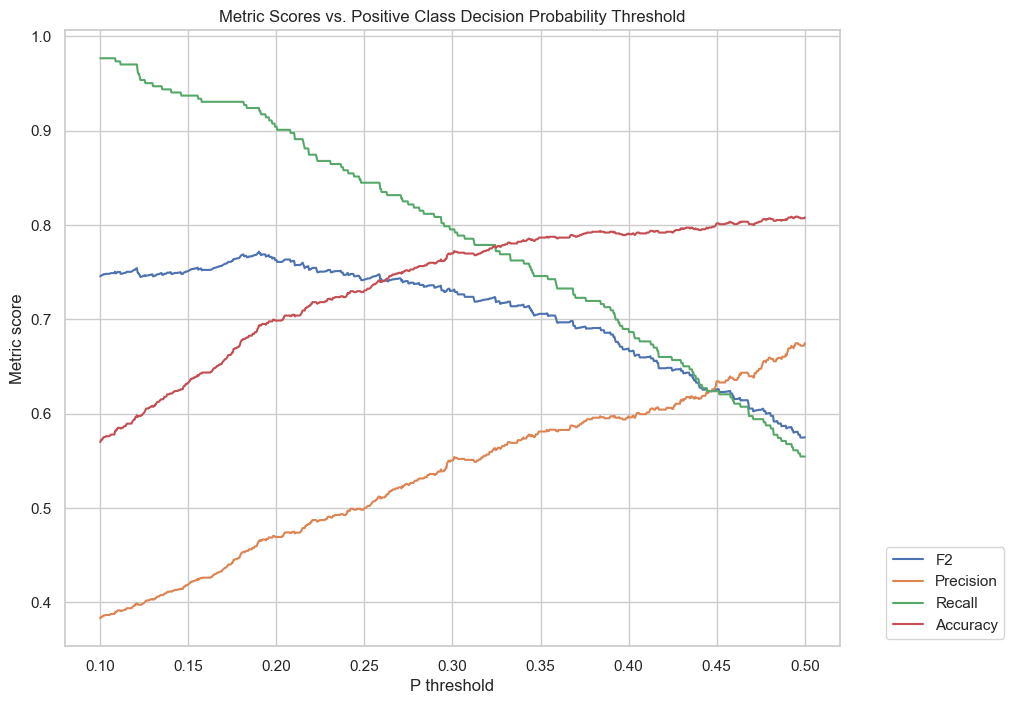

In [42]:

# X_val, y_val = X_te, y_te # explicitly calling this validation since we're using it for selection

thresh_ps = np.linspace(.10,.50,1000)
model_val_probs = clf_cv.predict_proba(x_val)[:,1] # positive class probs, same basic logistic model we fit in section 2 

f2_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
for p in thresh_ps:
    model_val_labels = model_val_probs >= p
    f2_scores.append(fbeta_score(y_val, model_val_labels,beta=2 ))    
    prec_scores.append(precision_score(y_val, model_val_labels))
    rec_scores.append(recall_score(y_val, model_val_labels))
    acc_scores.append(accuracy_score(y_val, model_val_labels))

plt.figure(figsize=(10,8))
plt.plot(thresh_ps, f2_scores)
plt.plot(thresh_ps, prec_scores)
plt.plot(thresh_ps, rec_scores)
plt.plot(thresh_ps, acc_scores)

plt.title('Metric Scores vs. Positive Class Decision Probability Threshold')
plt.legend(['F2','Precision','Recall','Accuracy'], bbox_to_anchor=(1.05, 0), loc='lower left')
plt.xlabel('P threshold')
plt.ylabel('Metric score')

best_f2_score = np.max(f2_scores) 
best_thresh_p = thresh_ps[np.argmax(f2_scores)]

print('Logistic Regression Model best F2 score %.3f at prob decision threshold >= %.3f' 
      % (best_f2_score, best_thresh_p))

* So I can get an F2 score of .770 with a threshold of .196, but im not quite satisfied yet, I will go ahead and try oversampling first before adjusting threshold

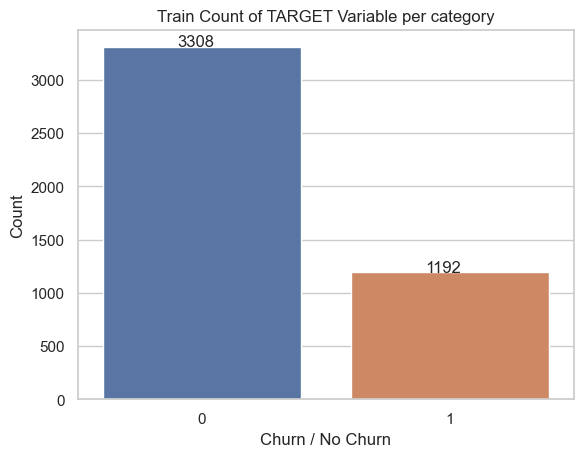

In [43]:
ax = sns.countplot(x= y_train)
# data['Churn'].value_counts().plot(kind='bar', figsize=(8, 6))
plt.title("Train Count of TARGET Variable per category")
plt.xlabel("Churn / No Churn")
plt.ylabel("Count")
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+5))

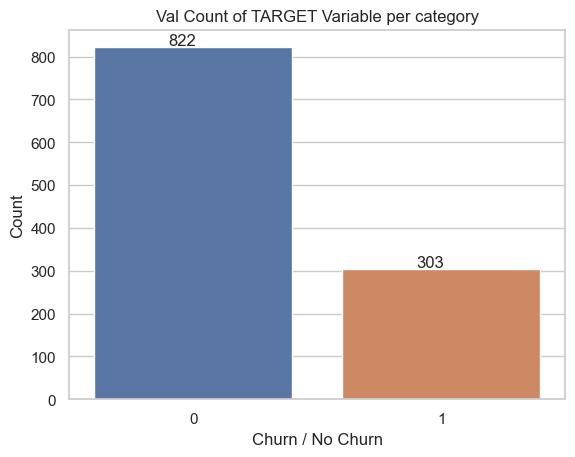

In [44]:
ax = sns.countplot(x= y_val )
plt.title("Val Count of TARGET Variable per category")
plt.xlabel("Churn / No Churn")
plt.ylabel("Count")
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+5))

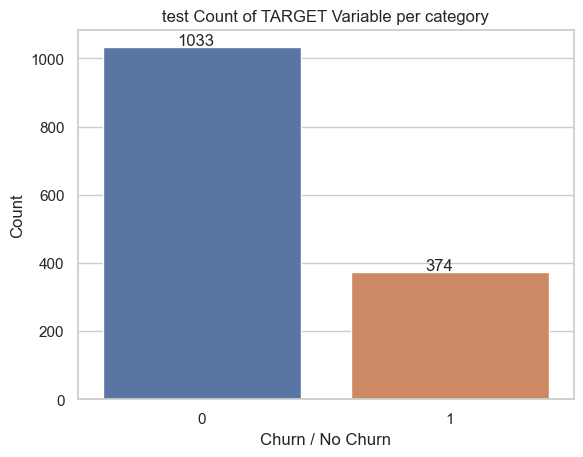

In [45]:
ax = sns.countplot(x= y_test)
plt.title("test Count of TARGET Variable per category")
plt.xlabel("Churn / No Churn")
plt.ylabel("Count")
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+5))

In [48]:
from imblearn.over_sampling import ADASYN
from collections import Counter
from mlxtend.plotting import plot_decision_regions

In [49]:
x_adasyn, y_adasyn = ADASYN(random_state=42).fit_resample(x_train, y_train)

In [50]:
Counter(y_train)

Counter({0: 3308, 1: 1192})

In [51]:
Counter(y_adasyn)

Counter({0: 3308, 1: 3321})

In [52]:
# fit log reg with adasyn data
c_list = np.linspace(.10,.50,1000)

kf = KFold(n_splits=5, random_state=0, shuffle=True)

clf_adasyn = LogisticRegressionCV(cv=kf, random_state=20, Cs=c_list)
clf_adasyn.fit(x_adasyn, y_adasyn)
ada_preds= clf_adasyn.predict(x_val)


print(f'Val Recall score: {recall_score(y_val, ada_preds)} ')
print(f'Val F2 score: {fbeta_score(y_val, ada_preds,beta=2)} ')
print('')
print(' val confusion_matrix:')
confusion_matrix(y_val, ada_preds)

Val Recall score: 0.7161716171617162 
Val F2 score: 0.673913043478261 

 val confusion_matrix:


array([[641, 181],
       [ 86, 217]])

* #### Now lets adjust threshold with this model

Logistic Regression Model best F2 score 0.751 at prob decision threshold >= 0.177


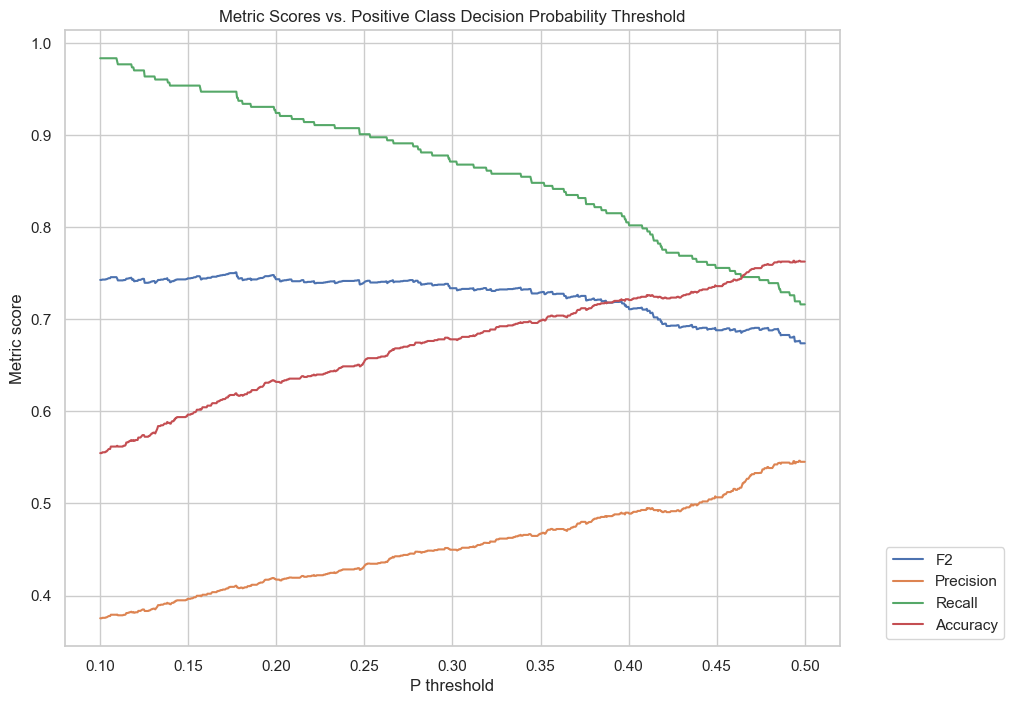

In [53]:
thresh_ps = np.linspace(.10,.50,1000)
model_val_probs = clf_adasyn.predict_proba(x_val)[:,1] # positive class probs, same basic logistic model we fit in section 2 

f2_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
for p in thresh_ps:
    model_val_labels = model_val_probs >= p
    f2_scores.append(fbeta_score(y_val, model_val_labels,beta=2 ))    
    prec_scores.append(precision_score(y_val, model_val_labels))
    rec_scores.append(recall_score(y_val, model_val_labels))
    acc_scores.append(accuracy_score(y_val, model_val_labels))

plt.figure(figsize=(10,8))
plt.plot(thresh_ps, f2_scores)
plt.plot(thresh_ps, prec_scores)
plt.plot(thresh_ps, rec_scores)
plt.plot(thresh_ps, acc_scores)

plt.title('Metric Scores vs. Positive Class Decision Probability Threshold')
plt.legend(['F2','Precision','Recall','Accuracy'], bbox_to_anchor=(1.05, 0), loc='lower left')
plt.xlabel('P threshold')
plt.ylabel('Metric score')

best_f2_score = np.max(f2_scores) 
best_thresh_p = thresh_ps[np.argmax(f2_scores)]

print('Logistic Regression Model best F2 score %.3f at prob decision threshold >= %.3f' 
      % (best_f2_score, best_thresh_p))

* Here we are doing a little worse than just the threshold adjusting

* ### Why dont we Try SMOTE

In [54]:
from imblearn.over_sampling import SMOTE
x_smoted, y_smoted = SMOTE(random_state=42).fit_resample(x_train,y_train)

In [55]:
Counter(y_smoted)

Counter({0: 3308, 1: 3308})

In [56]:
# fit log reg with smote data
c_list = np.linspace(.10,10,1000)

kf = KFold(n_splits=5, random_state=0, shuffle=True)

clf_smt = LogisticRegressionCV(cv=kf, random_state=20, Cs=c_list)
clf_smt.fit(x_smoted, y_smoted)
smt_preds= clf_smt.predict(x_val)


print(f'Val Recall score: {recall_score(y_val, smt_preds)} ')
print(f'Val F2 score: {fbeta_score(y_val, smt_preds,beta=2)} ')
print('')
print(' val confusion_matrix:')
confusion_matrix(y_val, smt_preds)

Val Recall score: 0.7062706270627063 
Val F2 score: 0.671267252195734 

 val confusion_matrix:


array([[654, 168],
       [ 89, 214]])

In [57]:
clf_smt.C_

array([5.24324324])

In [58]:
accuracy_score(y_val,smt_preds )

0.7715555555555556

Logistic Regression Model best F2 score 0.757 at prob decision threshold >= 0.189


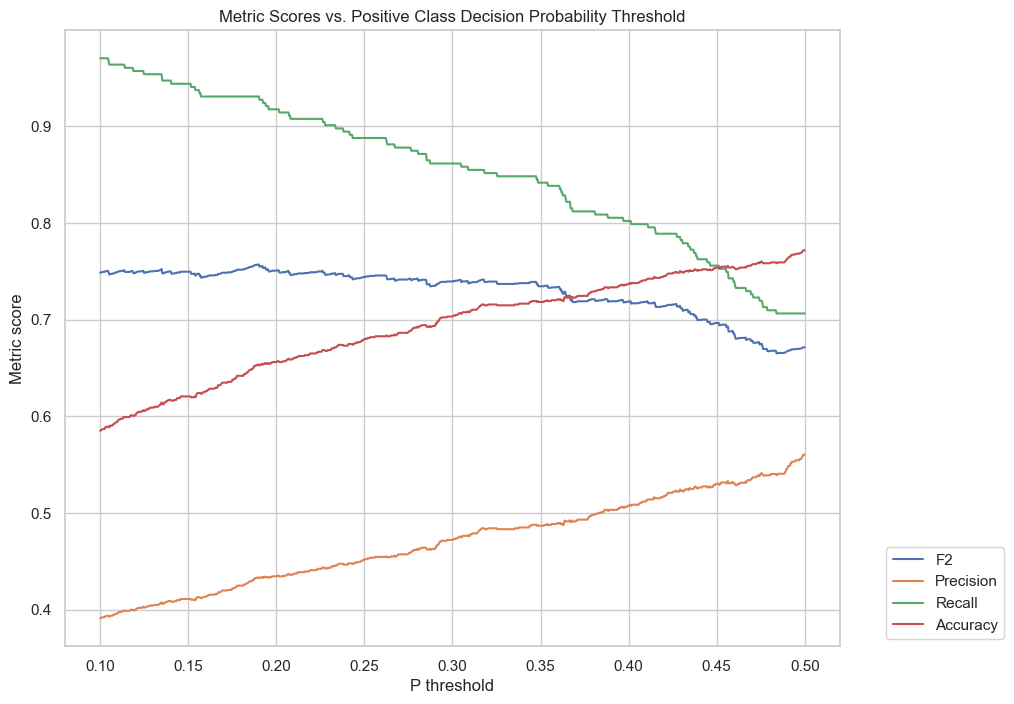

In [59]:
thresh_ps = np.linspace(.10,.50,1000)
model_val_probs = clf_smt.predict_proba(x_val)[:,1] # positive class probs, same basic logistic model we fit in section 2 

f2_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
for p in thresh_ps:
    model_val_labels = model_val_probs >= p
    f2_scores.append(fbeta_score(y_val, model_val_labels,beta=2 ))    
    prec_scores.append(precision_score(y_val, model_val_labels))
    rec_scores.append(recall_score(y_val, model_val_labels))
    acc_scores.append(accuracy_score(y_val, model_val_labels))

plt.figure(figsize=(10,8))
plt.plot(thresh_ps, f2_scores)
plt.plot(thresh_ps, prec_scores)
plt.plot(thresh_ps, rec_scores)
plt.plot(thresh_ps, acc_scores)

plt.title('Metric Scores vs. Positive Class Decision Probability Threshold')
plt.legend(['F2','Precision','Recall','Accuracy'], bbox_to_anchor=(1.05, 0), loc='lower left')
plt.xlabel('P threshold')
plt.ylabel('Metric score')

best_f2_score = np.max(f2_scores) 
best_thresh_p = thresh_ps[np.argmax(f2_scores)]

print('Logistic Regression Model best F2 score %.3f at prob decision threshold >= %.3f' 
      % (best_f2_score, best_thresh_p))

* still stand alone threshold adjustment leading with Log reg

In [60]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
%config InlineBackend.figure_formats = ['svg']  # or 'retina'

from sklearn.metrics import fbeta_score, make_scorer

In [65]:
X = full_data.drop('Churn', axis=1)
y = full_data["Churn"]
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=42)

In [61]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
f2_scorer = make_scorer(fbeta_score, beta=2)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, x_train, y_train, cv=10, scoring= f2_scorer)

print(scores)

[0.48951049 0.46819788 0.43672014 0.55841924 0.44404973 0.46572935
 0.49036778 0.46819788 0.54530201 0.46737213]


In [62]:
# search for an optimal value of K for KNN
k_range = list(range(1, 41))
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=10, scoring= f2_scorer)
    k_scores.append(scores.mean())

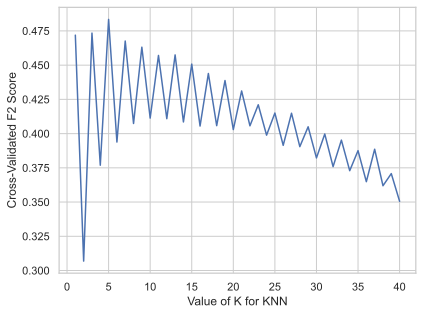

In [64]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated F2 Score')
# plt.savefig('./pics/knn.png')
plt.show()

In [65]:
from sklearn.model_selection import GridSearchCV
# define the parameter values that should be searched
k_range = list(range(1, 100))
#create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)
# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring= f2_scorer)

# fit the grid with data
grid.fit(x_train, y_train);

In [66]:
# view the complete results
df_cv = pd.DataFrame(grid.cv_results_)
df_cv.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002372,0.002790,0.008750,0.001223,1,{'n_neighbors': 1},0.495868,0.439932,0.437393,0.533898,0.407470,0.467446,0.425000,0.501672,0.518639,0.491525,0.471884,0.040568,3
1,0.001374,0.000081,0.009360,0.000939,2,{'n_neighbors': 2},0.307263,0.272556,0.288462,0.340909,0.276718,0.266667,0.289720,0.394495,0.376532,0.255682,0.306900,0.045438,70
2,0.001371,0.000102,0.009981,0.001815,3,{'n_neighbors': 3},0.460069,0.407080,0.435169,0.534483,0.440415,0.431779,0.504202,0.518135,0.547386,0.455342,0.473406,0.046194,2
3,0.001309,0.000068,0.009086,0.001576,4,{'n_neighbors': 4},0.384615,0.343866,0.357143,0.387454,0.368324,0.317164,0.378229,0.400729,0.472028,0.359779,0.376933,0.038995,33
4,0.001344,0.000076,0.008652,0.001243,5,{'n_neighbors': 5},0.489510,0.468198,0.436720,0.558419,0.444050,0.465729,0.490368,0.468198,0.545302,0.467372,0.483387,0.037821,1


In [67]:
# examine the best model
print("Best params: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)

Best params:  {'n_neighbors': 5}
Best estimator:  KNeighborsClassifier()
Best score:  0.4833866642416586


* KNN is doing quite badly with all we tried

* ### Decision Trees

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [69]:
X = full_data.drop('Churn', axis=1)
y = full_data["Churn"]

In [70]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train, test_size=.25, random_state=42)

In [71]:
dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)
dt.fit(x_train,y_train)
dt_pred=dt.predict(x_val)


print(f'Val Recall score: {recall_score(y_val, dt_pred)} ')
print(f'Val F2 score: {fbeta_score(y_val, dt_pred,beta=2)} ')
print('')
print(' val confusion_matrix:')
confusion_matrix(y_val, dt_pred)

Val Recall score: 0.6201550387596899 
Val F2 score: 0.6237006237006236 

 val confusion_matrix:


array([[884, 136],
       [147, 240]])

In [72]:
dt_tpred=dt.predict(x_test)


print(f'Val Recall score: {recall_score(y_test, dt_tpred)} ')
print(f'Val F2 score: {fbeta_score(y_test, dt_tpred,beta=2)} ')
print('')
print(' val confusion_matrix:')
confusion_matrix(y_test, dt_tpred)

Val Recall score: 0.5320855614973262 
Val F2 score: 0.5387114239306984 

 val confusion_matrix:


array([[881, 152],
       [175, 199]])

In [77]:
#lets check with adasyn

Decision Model best F2 score 0.755 at prob decision threshold >= 0.125


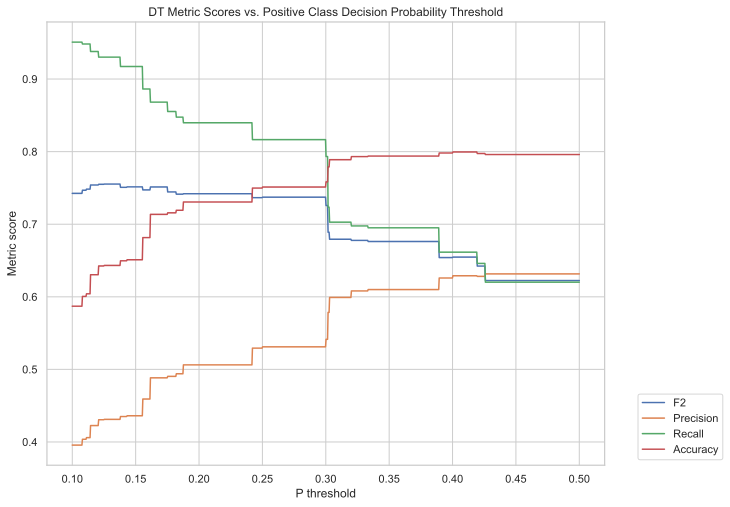

In [73]:

# X_val, y_val = X_te, y_te # explicitly calling this validation since we're using it for selection

thresh_ps = np.linspace(.10,.50,1000)
model_val_probs = dt.predict_proba(x_val)[:,1] # positive class probs, same basic logistic model we fit in section 2 

f2_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
for p in thresh_ps:
    model_val_labels = model_val_probs >= p
    f2_scores.append(fbeta_score(y_val, model_val_labels,beta=2 ))    
    prec_scores.append(precision_score(y_val, model_val_labels))
    rec_scores.append(recall_score(y_val, model_val_labels))
    acc_scores.append(accuracy_score(y_val, model_val_labels))

plt.figure(figsize=(10,8))
plt.plot(thresh_ps, f2_scores)
plt.plot(thresh_ps, prec_scores)
plt.plot(thresh_ps, rec_scores)
plt.plot(thresh_ps, acc_scores)

plt.title('DT Metric Scores vs. Positive Class Decision Probability Threshold')
plt.legend(['F2','Precision','Recall','Accuracy'], bbox_to_anchor=(1.05, 0), loc='lower left')
plt.xlabel('P threshold')
plt.ylabel('Metric score')

best_f2_score = np.max(f2_scores) 
best_thresh_p = thresh_ps[np.argmax(f2_scores)]

print('Decision Model best F2 score %.3f at prob decision threshold >= %.3f' 
      % (best_f2_score, best_thresh_p))

In [75]:
# fit log reg with adasyn data

dt_adasyn=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=9, min_samples_leaf=10)
dt_adasyn.fit(x_adasyn, y_adasyn)
dtada_preds= dt_adasyn.predict(x_val)


print(f'Val Recall score: {recall_score(y_val, dtada_preds)} ')
print(f'Val F2 score: {fbeta_score(y_val, dtada_preds,beta=2)} ')
print('')
print(' val confusion_matrix:')
confusion_matrix(y_val, dtada_preds)

Val Recall score: 0.7312661498708011 
Val F2 score: 0.6852300242130751 

 val confusion_matrix:


array([[786, 234],
       [104, 283]])

Logistic Regression Model best F2 score 0.754 at prob decision threshold >= 0.184


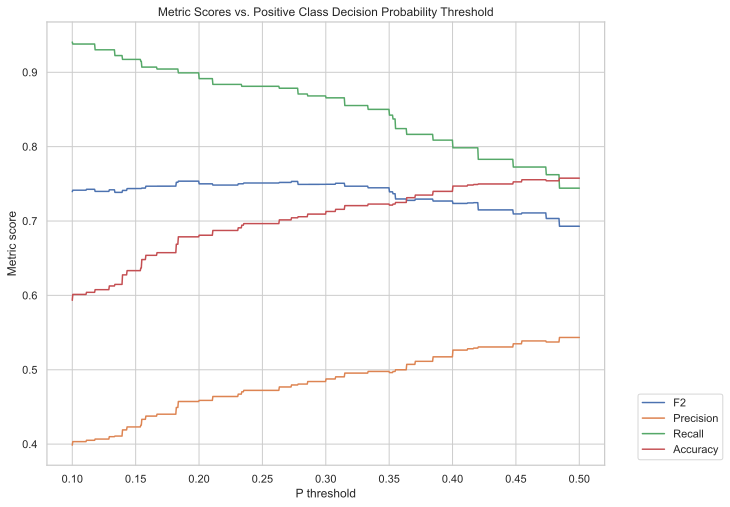

In [76]:

# X_val, y_val = X_te, y_te # explicitly calling this validation since we're using it for selection

thresh_ps = np.linspace(.10,.50,1000)
model_val_probs = dt_adasyn.predict_proba(x_val)[:,1] # positive class probs, same basic logistic model we fit in section 2 

f2_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
for p in thresh_ps:
    model_val_labels = model_val_probs >= p
    f2_scores.append(fbeta_score(y_val, model_val_labels,beta=2 ))    
    prec_scores.append(precision_score(y_val, model_val_labels))
    rec_scores.append(recall_score(y_val, model_val_labels))
    acc_scores.append(accuracy_score(y_val, model_val_labels))

plt.figure(figsize=(10,8))
plt.plot(thresh_ps, f2_scores)
plt.plot(thresh_ps, prec_scores)
plt.plot(thresh_ps, rec_scores)
plt.plot(thresh_ps, acc_scores)

plt.title('Metric Scores vs. Positive Class Decision Probability Threshold')
plt.legend(['F2','Precision','Recall','Accuracy'], bbox_to_anchor=(1.05, 0), loc='lower left')
plt.xlabel('P threshold')
plt.ylabel('Metric score')

best_f2_score = np.max(f2_scores) 
best_thresh_p = thresh_ps[np.argmax(f2_scores)]

print('Logistic Regression Model best F2 score %.3f at prob decision threshold >= %.3f' 
      % (best_f2_score, best_thresh_p))

DT Model best test F2 score 0.724 at prob decision threshold >= 0.111


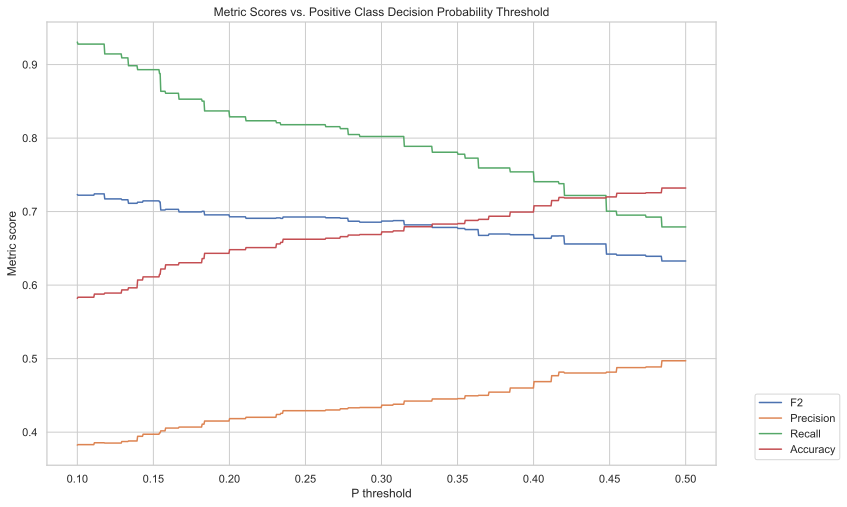

In [77]:

# X_val, y_val = X_te, y_te # explicitly calling this validation since we're using it for selection

thresh_ps = np.linspace(.10,.50,1000)
model_test_probs = dt_adasyn.predict_proba(x_test)[:,1] # positive class probs, same basic logistic model we fit in section 2 

f2_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
for p in thresh_ps:
    model_test_labels = model_test_probs >= p
    f2_scores.append(fbeta_score(y_test, model_test_labels,beta=2 ))    
    prec_scores.append(precision_score(y_test, model_test_labels))
    rec_scores.append(recall_score(y_test, model_test_labels))
    acc_scores.append(accuracy_score(y_test, model_test_labels))

plt.figure(figsize=(12,8))
plt.plot(thresh_ps, f2_scores)
plt.plot(thresh_ps, prec_scores)
plt.plot(thresh_ps, rec_scores)
plt.plot(thresh_ps, acc_scores)

plt.title('Metric Scores vs. Positive Class Decision Probability Threshold')
plt.legend(['F2','Precision','Recall','Accuracy'], bbox_to_anchor=(1.05, 0), loc='lower left')
plt.xlabel('P threshold')
plt.ylabel('Metric score')

best_f2_score = np.max(f2_scores) 
best_thresh_p = thresh_ps[np.argmax(f2_scores)]

print('DT Model best test F2 score %.3f at prob decision threshold >= %.3f' 
      % (best_f2_score, best_thresh_p))

In [78]:
rf_model=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=10, min_samples_leaf=12)
rf_model.fit(x_train,y_train)
rf_preds=rf_model.predict(x_val)


print(f'Val Recall score: {recall_score(y_val, rf_preds)} ')
print(f'Val F2 score: {fbeta_score(y_val, rf_preds,beta=2)} ')
print('')
print(' val confusion_matrix:')
confusion_matrix(y_val, rf_preds)

Val Recall score: 0.5064599483204134 
Val F2 score: 0.5343511450381679 

 val confusion_matrix:


array([[930,  90],
       [191, 196]])

Base RF Model best F2 score 0.771 at prob decision threshold >= 0.176


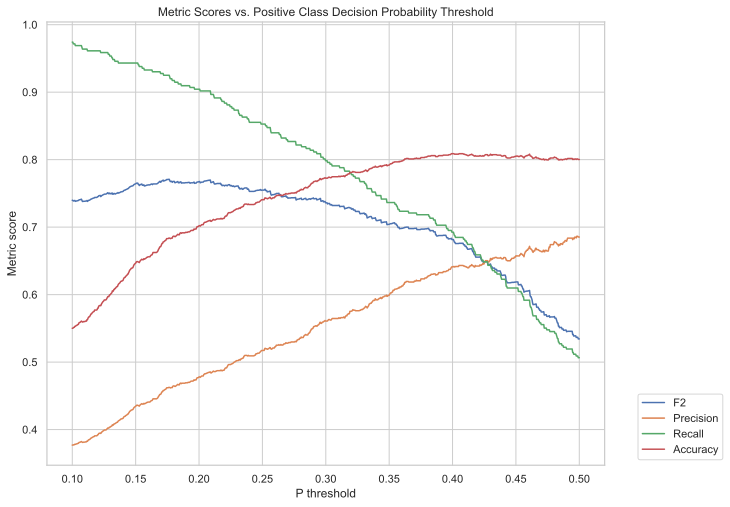

In [79]:

# X_val, y_val = X_te, y_te # explicitly calling this validation since we're using it for selection

thresh_ps = np.linspace(.10,.50,1000)
model_val_probs = rf_model.predict_proba(x_val)[:,1] # positive class probs, same basic logistic model we fit in section 2 

f2_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
for p in thresh_ps:
    model_val_labels = model_val_probs >= p
    f2_scores.append(fbeta_score(y_val, model_val_labels,beta=2 ))    
    prec_scores.append(precision_score(y_val, model_val_labels))
    rec_scores.append(recall_score(y_val, model_val_labels))
    acc_scores.append(accuracy_score(y_val, model_val_labels))

plt.figure(figsize=(10,8))
plt.plot(thresh_ps, f2_scores)
plt.plot(thresh_ps, prec_scores)
plt.plot(thresh_ps, rec_scores)
plt.plot(thresh_ps, acc_scores)

plt.title('Metric Scores vs. Positive Class Decision Probability Threshold')
plt.legend(['F2','Precision','Recall','Accuracy'], bbox_to_anchor=(1.05, 0), loc='lower left')
plt.xlabel('P threshold')
plt.ylabel('Metric score')

best_f2_score = np.max(f2_scores) 
best_thresh_p = thresh_ps[np.argmax(f2_scores)]

print('Base RF Model best F2 score %.3f at prob decision threshold >= %.3f' 
      % (best_f2_score, best_thresh_p))

RF Model best test F2 score 0.744 at prob decision threshold >= 0.175


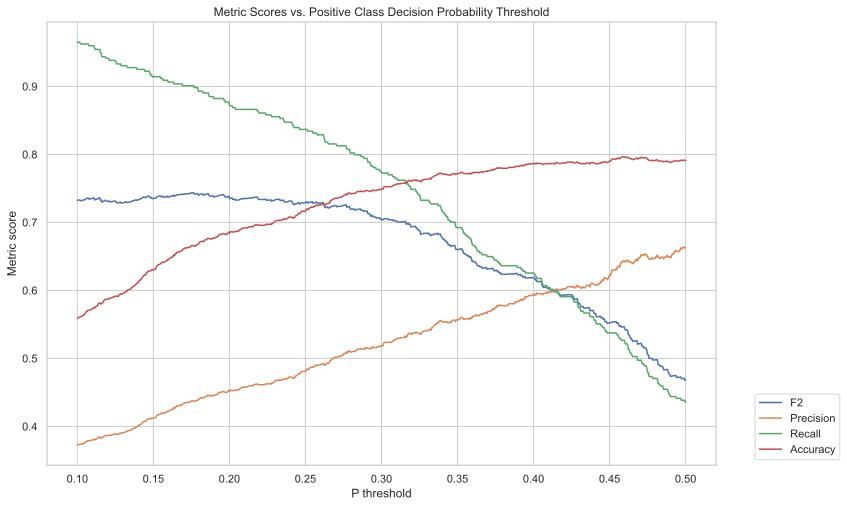

In [80]:
thresh_ps = np.linspace(.10,.50,1000)
model_test_probs = rf_model.predict_proba(x_test)[:,1] # positive class probs, same basic logistic model we fit in section 2 

f2_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
for p in thresh_ps:
    model_test_labels = model_test_probs >= p
    f2_scores.append(fbeta_score(y_test, model_test_labels,beta=2 ))    
    prec_scores.append(precision_score(y_test, model_test_labels))
    rec_scores.append(recall_score(y_test, model_test_labels))
    acc_scores.append(accuracy_score(y_test, model_test_labels))

plt.figure(figsize=(12,8))
plt.plot(thresh_ps, f2_scores)
plt.plot(thresh_ps, prec_scores)
plt.plot(thresh_ps, rec_scores)
plt.plot(thresh_ps, acc_scores)

plt.title('Metric Scores vs. Positive Class Decision Probability Threshold')
plt.legend(['F2','Precision','Recall','Accuracy'], bbox_to_anchor=(1.05, 0), loc='lower left')
plt.xlabel('P threshold')
plt.ylabel('Metric score')

best_f2_score = np.max(f2_scores) 
best_thresh_p = thresh_ps[np.argmax(f2_scores)]

print('RF Model best test F2 score %.3f at prob decision threshold >= %.3f' 
      % (best_f2_score, best_thresh_p))

In [81]:

rf_adasyn=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=5, min_samples_leaf=12)
rf_adasyn.fit(x_adasyn, y_adasyn)
rfada_preds= rf_adasyn.predict(x_val)


print(f'Val Recall score: {recall_score(y_val, rfada_preds)} ')
print(f'Val F2 score: {fbeta_score(y_val, rfada_preds,beta=2)} ')
print('')
print(' val confusion_matrix:')
confusion_matrix(y_val, rfada_preds)

Val Recall score: 0.7984496124031008 
Val F2 score: 0.7239925023430177 

 val confusion_matrix:


array([[743, 277],
       [ 78, 309]])

RF ADASYN Model best F2 score 0.759 at prob decision threshold >= 0.396


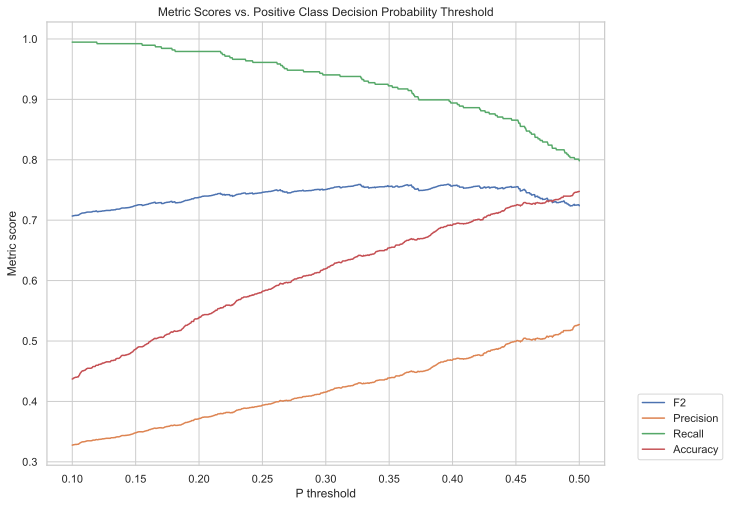

In [82]:

# X_val, y_val = X_te, y_te # explicitly calling this validation since we're using it for selection

thresh_ps = np.linspace(.10,.50,1000)
model_val_probs = rf_adasyn.predict_proba(x_val)[:,1] # positive class probs, same basic logistic model we fit in section 2 

f2_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
for p in thresh_ps:
    model_val_labels = model_val_probs >= p
    f2_scores.append(fbeta_score(y_val, model_val_labels,beta=2 ))    
    prec_scores.append(precision_score(y_val, model_val_labels))
    rec_scores.append(recall_score(y_val, model_val_labels))
    acc_scores.append(accuracy_score(y_val, model_val_labels))

plt.figure(figsize=(10,8))
plt.plot(thresh_ps, f2_scores)
plt.plot(thresh_ps, prec_scores)
plt.plot(thresh_ps, rec_scores)
plt.plot(thresh_ps, acc_scores)

plt.title('Metric Scores vs. Positive Class Decision Probability Threshold')
plt.legend(['F2','Precision','Recall','Accuracy'], bbox_to_anchor=(1.05, 0), loc='lower left')
plt.xlabel('P threshold')
plt.ylabel('Metric score')

best_f2_score = np.max(f2_scores) 
best_thresh_p = thresh_ps[np.argmax(f2_scores)]

print('RF ADASYN Model best F2 score %.3f at prob decision threshold >= %.3f' 
      % (best_f2_score, best_thresh_p))

RF ADYSYN best test F2 score 0.738 at prob decision threshold >= 0.250


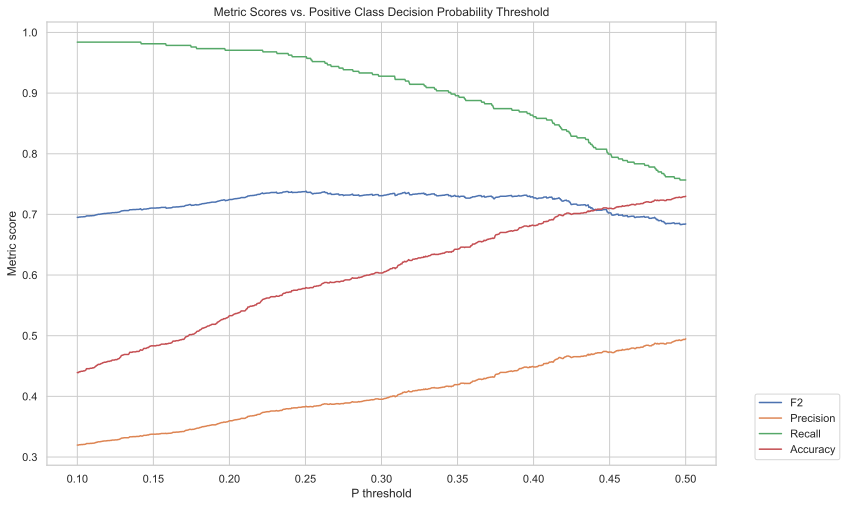

In [83]:

# X_val, y_val = X_te, y_te # explicitly calling this validation since we're using it for selection

thresh_ps = np.linspace(.10,.50,1000)
model_test_probs = rf_adasyn.predict_proba(x_test)[:,1] # positive class probs, same basic logistic model we fit in section 2 

f2_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
for p in thresh_ps:
    model_test_labels = model_test_probs >= p
    f2_scores.append(fbeta_score(y_test, model_test_labels,beta=2 ))    
    prec_scores.append(precision_score(y_test, model_test_labels))
    rec_scores.append(recall_score(y_test, model_test_labels))
    acc_scores.append(accuracy_score(y_test, model_test_labels))

plt.figure(figsize=(12,8))
plt.plot(thresh_ps, f2_scores)
plt.plot(thresh_ps, prec_scores)
plt.plot(thresh_ps, rec_scores)
plt.plot(thresh_ps, acc_scores)

plt.title('Metric Scores vs. Positive Class Decision Probability Threshold')
plt.legend(['F2','Precision','Recall','Accuracy'], bbox_to_anchor=(1.05, 0), loc='lower left')
plt.xlabel('P threshold')
plt.ylabel('Metric score')

best_f2_score = np.max(f2_scores) 
best_thresh_p = thresh_ps[np.argmax(f2_scores)]

print('RF ADYSYN best test F2 score %.3f at prob decision threshold >= %.3f' 
      % (best_f2_score, best_thresh_p))

In [85]:
%config InlineBackend.figure_formats = ['retina']

import xgboost as xgb
from sklearn.metrics import plot_confusion_matrix 

In [87]:

clf_xgb = xgb.XGBClassifier(objective='binary:logistic', 
                            eval_metric=["logloss", 'aucpr'], ## this avoids a warning...
                            seed=42, 
                            use_label_encoder=False)
clf_xgb.fit(x_train, 
            y_train,
            verbose=True,
            ## the next three arguments set up early stopping.
            early_stopping_rounds=50,
            # eval_metric='aucpr',
            eval_set=[(x_val, y_val)])
            

fbeta_score(y_test, clf_xgb.predict(x_test, ntree_limit=clf_xgb.best_ntree_limit), beta=2) 

[0]	validation_0-logloss:0.58082	validation_0-aucpr:0.64290
[1]	validation_0-logloss:0.52069	validation_0-aucpr:0.65484
[2]	validation_0-logloss:0.48417	validation_0-aucpr:0.65762
[3]	validation_0-logloss:0.46160	validation_0-aucpr:0.65909
[4]	validation_0-logloss:0.44566	validation_0-aucpr:0.66502
[5]	validation_0-logloss:0.43661	validation_0-aucpr:0.66557
[6]	validation_0-logloss:0.42749	validation_0-aucpr:0.67146
[7]	validation_0-logloss:0.42443	validation_0-aucpr:0.67172
[8]	validation_0-logloss:0.42058	validation_0-aucpr:0.67385
[9]	validation_0-logloss:0.41799	validation_0-aucpr:0.67764
[10]	validation_0-logloss:0.41623	validation_0-aucpr:0.67808
[11]	validation_0-logloss:0.41538	validation_0-aucpr:0.67888
[12]	validation_0-logloss:0.41548	validation_0-aucpr:0.67749
[13]	validation_0-logloss:0.41569	validation_0-aucpr:0.67669
[14]	validation_0-logloss:0.41827	validation_0-aucpr:0.67281
[15]	validation_0-logloss:0.41830	validation_0-aucpr:0.67265
[16]	validation_0-logloss:0.41953	

0.5095720720720721

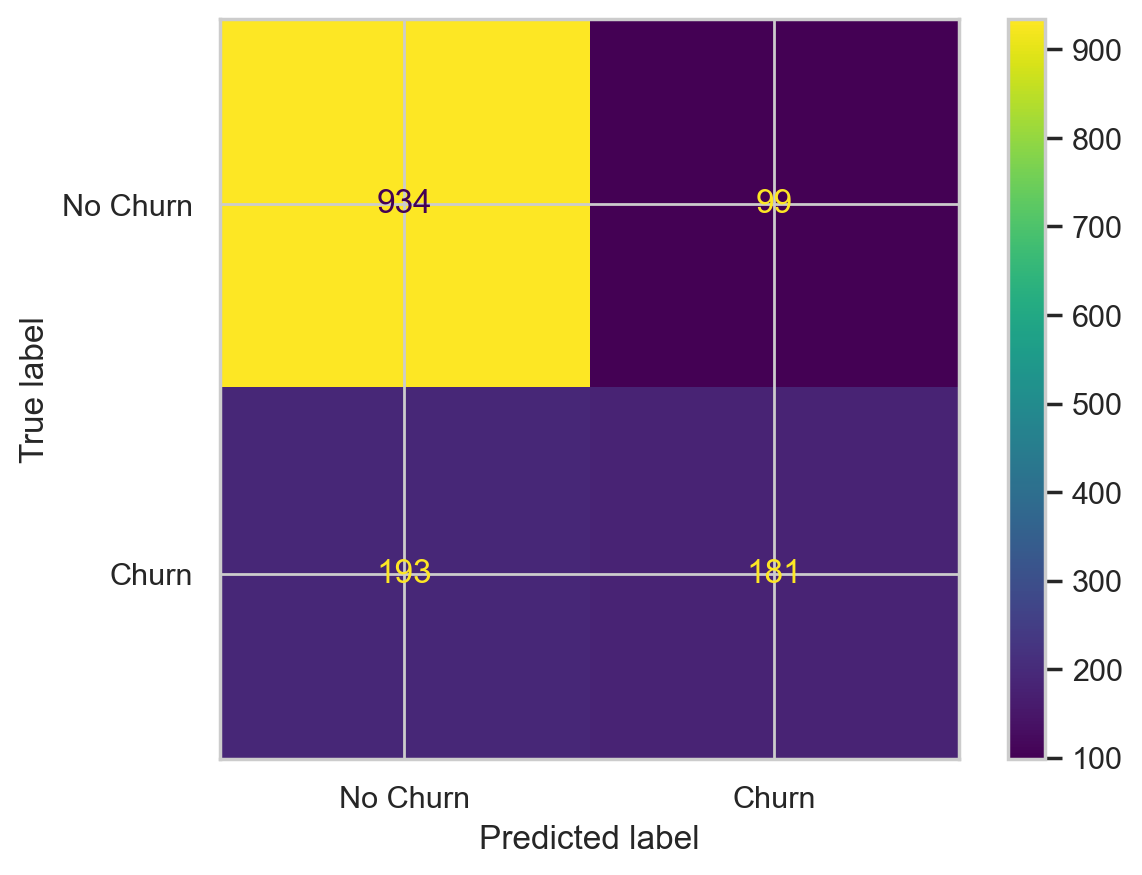

In [88]:
plot_confusion_matrix(clf_xgb, 
                      x_test, 
                      y_test,
                      values_format='d',
                      display_labels=["No Churn", "Churn"])

In [91]:
## 
## I ran GridSearchCV sequentially on subsets of parameter options, rather than all at once
## in order to optimize parameters in a short period of time.

# ROUND 1
# param_grid = {
#     'max_depth': [2, 3,4],
#     'learning_rate': [0.1, 0.01, 0.05],
#     'gamma': [0, 0.25, 1.0],
#     'reg_lambda': [0, 1.0, 10.0],
#     'scale_pos_weight': [.5, 1, 3] # NOTE: XGBoost recommends sum(negative instances) / sum(positive instances)
# }
# Output: 'gamma': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'reg_lambda': 10.0, 'scale_pos_weight': 1
## ROUND 2
param_grid = {
    'max_depth': [2,3,4],
    'learning_rate': [.05, 0.1, 0.5],
    'gamma': [0.5, 1, 1.25],
    'reg_lambda': [5,7,10.0,],
     'scale_pos_weight': [ .5, 1, 3]
}
## Output: max_depth: 4, learning_rate: 0.1, reg_lambda: 10.


optimal_params = GridSearchCV(
    estimator=xgb.XGBClassifier(objective='binary:logistic', 
                                eval_metric=["logloss",'auc'], ## this avoids a warning...
                                early_stopping_rounds=10,
                                seed=42,
                                subsample=0.9,
                                colsample_bytree=0.5,
                                use_label_encoder=False),
    param_grid=param_grid,
    scoring='roc_auc',
    verbose=0, 
    n_jobs = 10,
    cv = 5
)

optimal_params.fit(x_train, 
                   y_train, 
                                   
                   eval_set=[(x_val, y_val)],
                   verbose=False)
print(optimal_params.best_params_)

{'gamma': 1, 'learning_rate': 0.1, 'max_depth': 3, 'reg_lambda': 10.0, 'scale_pos_weight': 1}


After testing all possible combinations of the potential parameter values with **Cross Validation**, we see that we should set `gamma=1`, `learn_rate=0.1`, `max_depth=3`, and `reg_lambda=10`.

In [92]:
clf_xgb = xgb.XGBClassifier(seed=42,
                        objective='binary:logistic',
                        eval_metric=["logloss", 'aucpr'], ## this avoids warning...
                        gamma=0.25,
                        learning_rate=0.1,
                        max_depth=4,
                        reg_lambda=10,
                        scale_pos_weight=3,
                        subsample=0.9,
                        colsample_bytree=0.5,
                        use_label_encoder=False)
clf_xgb.fit(x_train, 
            y_train, 
            verbose=True, 
            early_stopping_rounds=50,
            eval_set=[(x_val, y_val)])

xgb_preds=clf_xgb.predict(x_val)
print(f'Val Recall score: {recall_score(y_val, xgb_preds)} ')
print(f'Val F2 score: {fbeta_score(y_val, xgb_preds,beta=2)} ')
print('')
print(' val confusion_matrix:')
confusion_matrix(y_val, xgb_preds)

[0]	validation_0-logloss:0.67412	validation_0-aucpr:0.54692
[1]	validation_0-logloss:0.65465	validation_0-aucpr:0.56261
[2]	validation_0-logloss:0.63562	validation_0-aucpr:0.60281
[3]	validation_0-logloss:0.61643	validation_0-aucpr:0.63281
[4]	validation_0-logloss:0.60576	validation_0-aucpr:0.63463
[5]	validation_0-logloss:0.59411	validation_0-aucpr:0.65552
[6]	validation_0-logloss:0.58195	validation_0-aucpr:0.65593
[7]	validation_0-logloss:0.57133	validation_0-aucpr:0.65638
[8]	validation_0-logloss:0.56312	validation_0-aucpr:0.65497
[9]	validation_0-logloss:0.55602	validation_0-aucpr:0.65943
[10]	validation_0-logloss:0.55065	validation_0-aucpr:0.65787
[11]	validation_0-logloss:0.54547	validation_0-aucpr:0.66168
[12]	validation_0-logloss:0.54063	validation_0-aucpr:0.66251
[13]	validation_0-logloss:0.53644	validation_0-aucpr:0.66152
[14]	validation_0-logloss:0.53186	validation_0-aucpr:0.66668
[15]	validation_0-logloss:0.52780	validation_0-aucpr:0.66984
[16]	validation_0-logloss:0.52493	

array([[720, 300],
       [ 58, 329]])

XGBoost Model best F2 score 0.769 at prob decision threshold >= 0.383


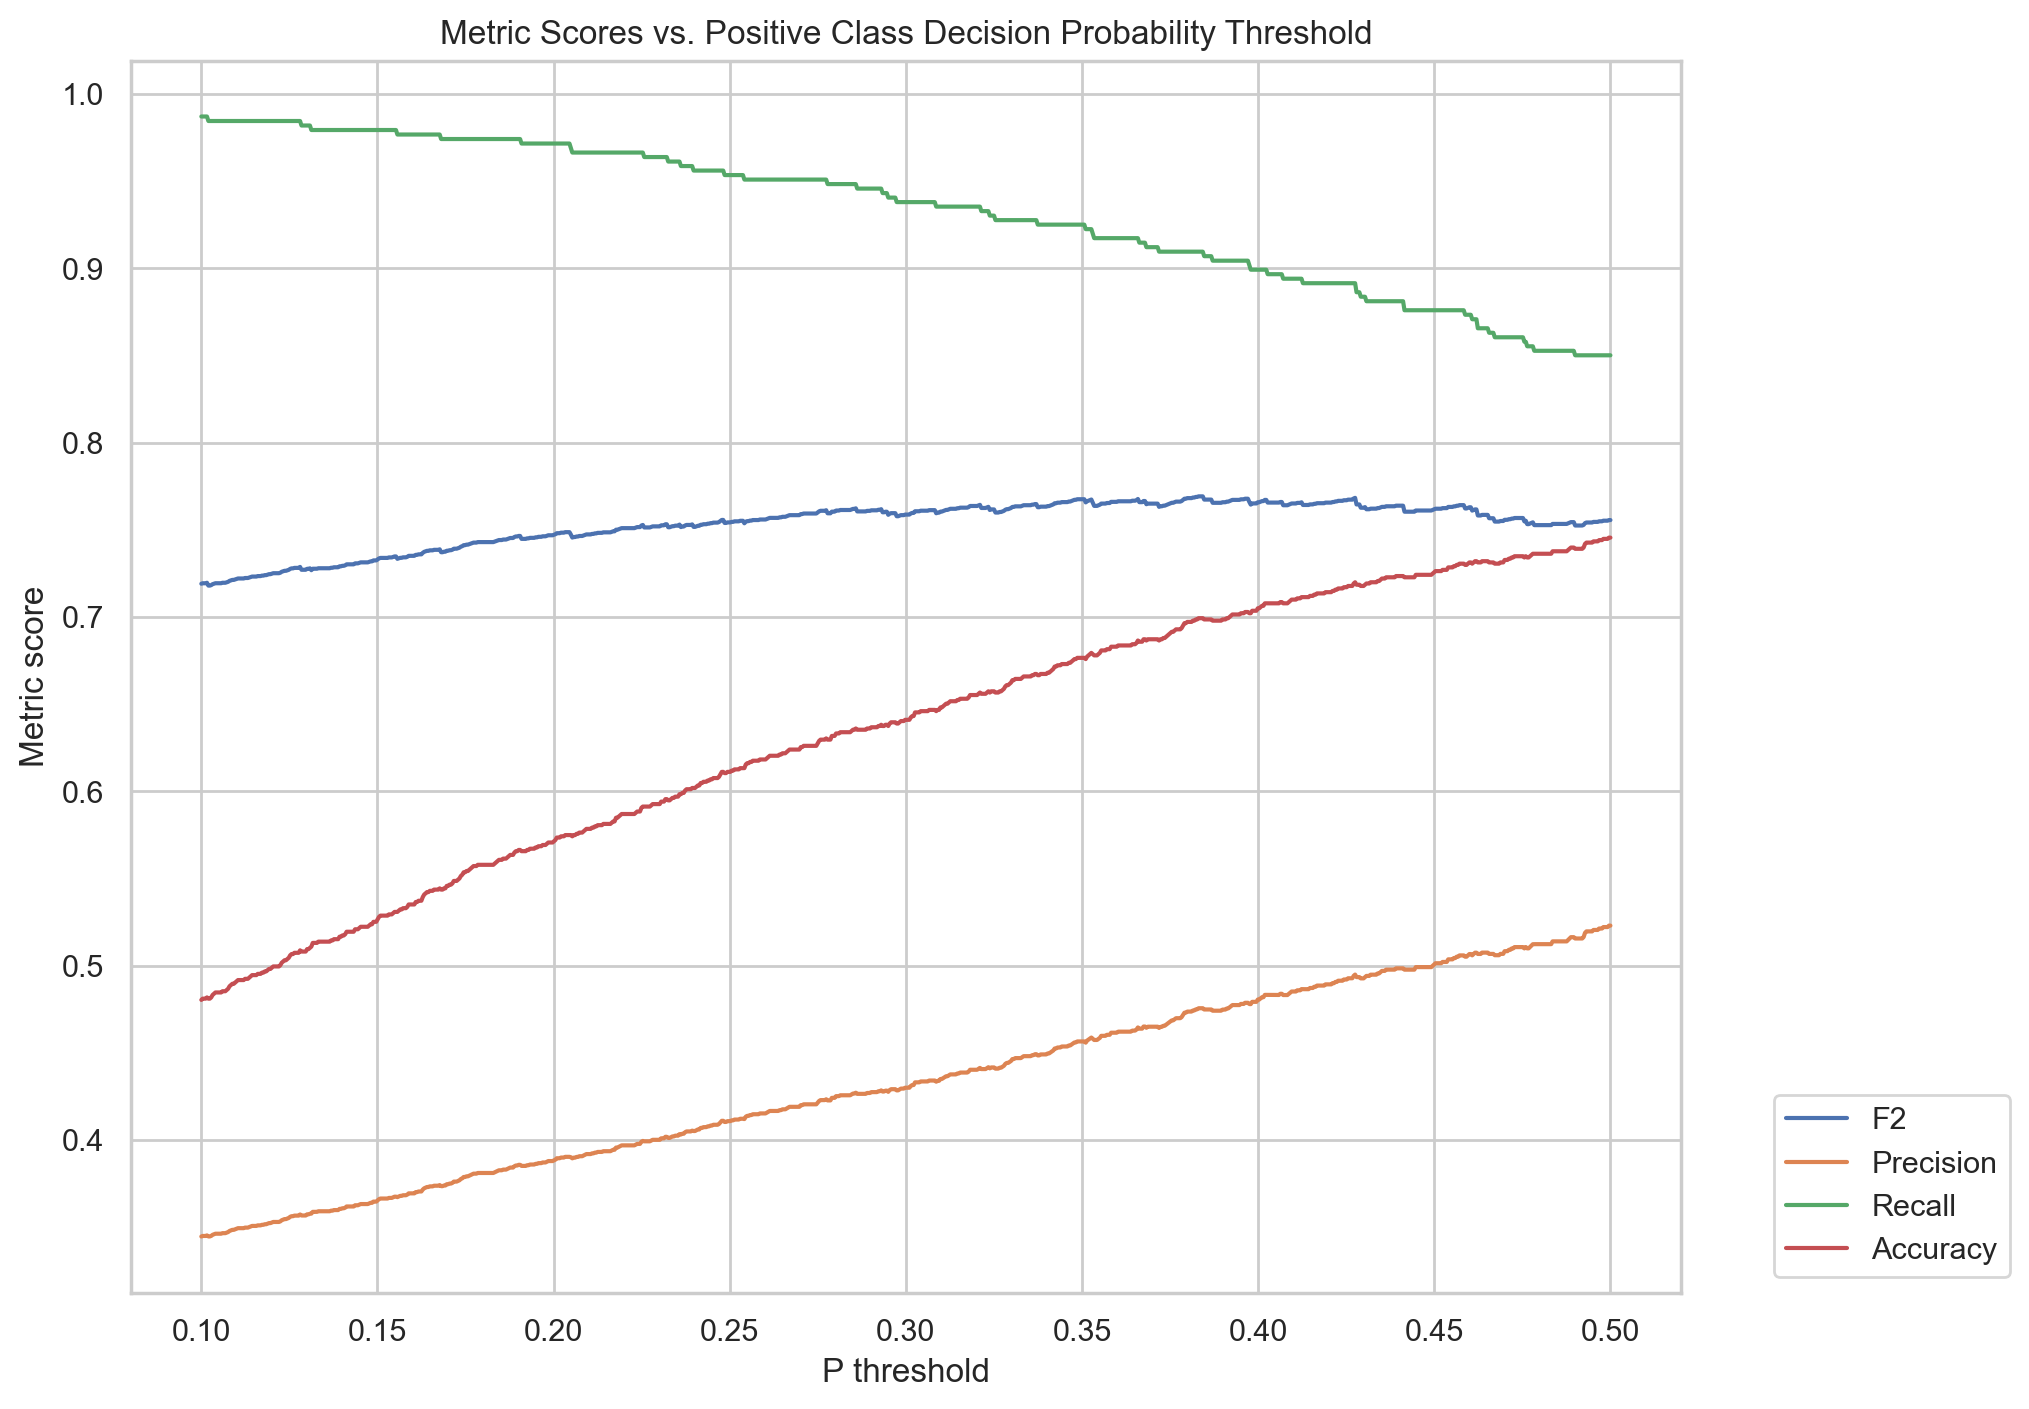

In [93]:

# X_val, y_val = X_te, y_te # explicitly calling this validation since we're using it for selection

thresh_ps = np.linspace(.10,.50,1000)
model_val_probs = clf_xgb.predict_proba(x_val)[:,1] # positive class probs, same basic logistic model we fit in section 2 

f2_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
for p in thresh_ps:
    model_val_labels = model_val_probs >= p
    f2_scores.append(fbeta_score(y_val, model_val_labels,beta=2 ))    
    prec_scores.append(precision_score(y_val, model_val_labels))
    rec_scores.append(recall_score(y_val, model_val_labels))
    acc_scores.append(accuracy_score(y_val, model_val_labels))

plt.figure(figsize=(10,8))
plt.plot(thresh_ps, f2_scores)
plt.plot(thresh_ps, prec_scores)
plt.plot(thresh_ps, rec_scores)
plt.plot(thresh_ps, acc_scores)

plt.title('Metric Scores vs. Positive Class Decision Probability Threshold')
plt.legend(['F2','Precision','Recall','Accuracy'], bbox_to_anchor=(1.05, 0), loc='lower left')
plt.xlabel('P threshold')
plt.ylabel('Metric score')

best_f2_score = np.max(f2_scores) 
best_thresh_p = thresh_ps[np.argmax(f2_scores)]

print('XGBoost Model best F2 score %.3f at prob decision threshold >= %.3f' 
      % (best_f2_score, best_thresh_p))

XGBoost best test F2 score 0.741 at prob decision threshold >= 0.379


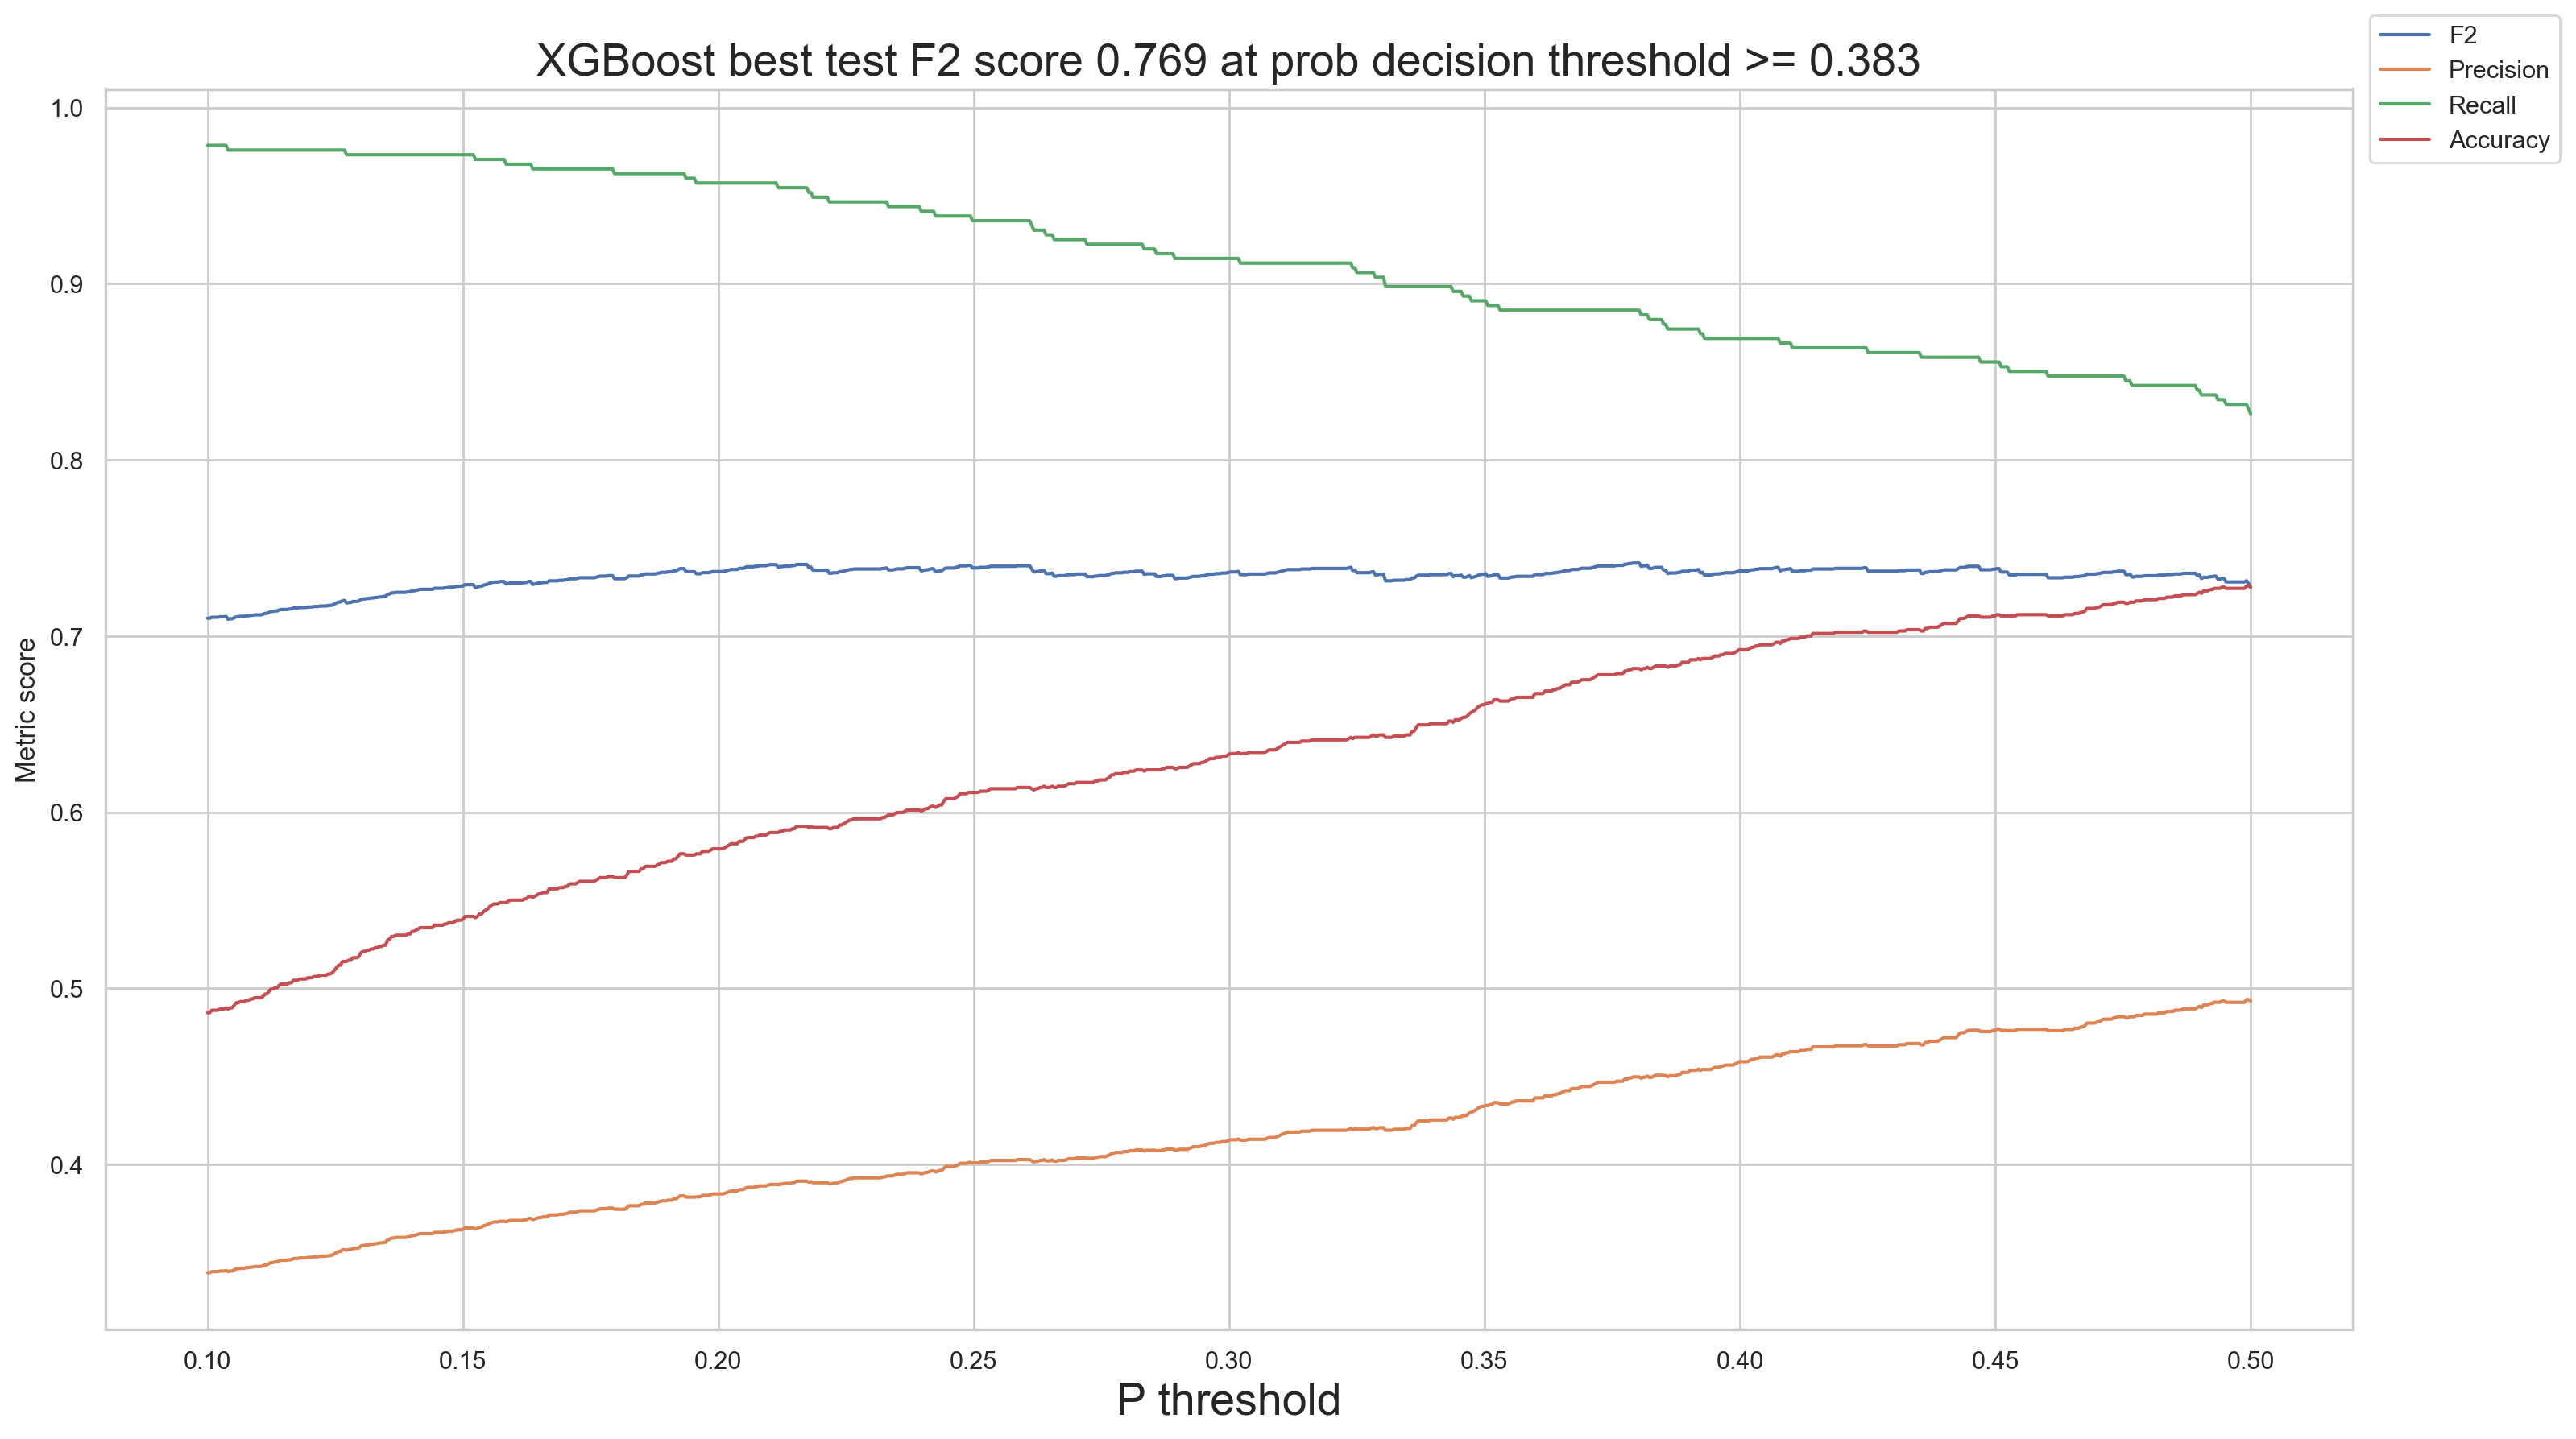

In [95]:

# X_val, y_val = X_te, y_te # explicitly calling this validation since we're using it for selection

thresh_ps = np.linspace(.10,.50,1000)
model_test_probs = clf_xgb.predict_proba(x_test)[:,1] # positive class probs, same basic logistic model we fit in section 2 

f2_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
for p in thresh_ps:
    model_test_labels = model_test_probs >= p
    f2_scores.append(fbeta_score(y_test, model_test_labels,beta=2 ))    
    prec_scores.append(precision_score(y_test, model_test_labels))
    rec_scores.append(recall_score(y_test, model_test_labels))
    acc_scores.append(accuracy_score(y_test, model_test_labels))

plt.figure(figsize=(18,10))
plt.plot(thresh_ps, f2_scores)
plt.plot(thresh_ps, prec_scores)
plt.plot(thresh_ps, rec_scores)
plt.plot(thresh_ps, acc_scores)

plt.title('XGBoost best test F2 score %.3f at prob decision threshold >= %.3f' 
      % (best_f2_score, best_thresh_p),fontdict={'size': 20})
plt.legend(['F2','Precision','Recall','Accuracy'], bbox_to_anchor=(1.05, 1), loc='center')
plt.xlabel('P threshold',fontdict={'size': 20})
plt.ylabel('Metric score')
# plt.savefig('./pics/xgbtest.png')

best_f2_score = np.max(f2_scores) 
best_thresh_p = thresh_ps[np.argmax(f2_scores)]

print('XGBoost best test F2 score %.3f at prob decision threshold >= %.3f' 
      % (best_f2_score, best_thresh_p))

* ### ok lets visit Adasyn now

In [97]:
## First lets find optimal parameters

# ROUND 1
# param_grid = {
#     'max_depth': [2, 3,4],
#     'learning_rate': [0.1, 0.01, 0.05],
#     'gamma': [0, 0.25, 1.0],
#     'reg_lambda': [0, 1.0, 10.0],
#     'scale_pos_weight': [1, 3,5] # NOTE: XGBoost recommends sum(negative instances) / sum(positive instances)
# }
# Output1: {'gamma': 0.25, 'learning_rate': 0.1, 'max_depth': 4, 'reg_lambda': 0, 'scale_pos_weight': 3}

# Because most of our params were at the end were at the ends of their range, we will continue to those...

## ROUND 2
param_grid = {
    'max_depth': [3,4,5],
    'learning_rate': [.01, 0.1, 1],
    'gamma': [0.25, .5, 1],
    'reg_lambda': [0,0.5,1.0,],
     'scale_pos_weight': [1, 3,5]
}
## Output2: {'gamma': 0.25, 'learning_rate': 0.1, 'max_depth': 5, 'reg_lambda': 0, 'scale_pos_weight': 3}

optimal_params = GridSearchCV(
    estimator=xgb.XGBClassifier(objective='binary:logistic', 
                                eval_metric=["logloss",'auc'], ## this avoids a warning...
                                seed=42,
                                subsample=0.9,
                                early_stopping_rounds=10,
                                colsample_bytree=0.5,
                                use_label_encoder=False),
    param_grid=param_grid,
    scoring='roc_auc', ## see https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
    verbose=0, # NOTE: If you want to see what Grid Search is doing, set verbose=2
    n_jobs = 10,
    cv = 5
)

optimal_params.fit(x_adasyn, 
                   y_adasyn, 
                   eval_set=[(x_val, y_val)],
                   verbose=False)
print(optimal_params.best_params_)

{'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 5, 'reg_lambda': 0.5, 'scale_pos_weight': 3}


In [98]:
ada_xgb = xgb.XGBClassifier(seed=42,
                        objective='binary:logistic',
                        eval_metric=["logloss",'aucpr'], ## this avoids warning...
                        gamma=0.25,
                        learning_rate=0.1,
                        max_depth=5,
                        reg_lambda=0,
                        early_stopping_rounds=50,
                        scale_pos_weight=3,
                        subsample=0.9,
                        colsample_bytree=0.5,
                        use_label_encoder=False)
ada_xgb.fit(x_adasyn, 
            y_adasyn, 
            verbose=True, 
            eval_set=[(x_val, y_val)])

ada_xgb_preds=ada_xgb.predict(x_val)
print(f'Val Recall score: {recall_score(y_val, ada_xgb_preds)} ')
print(f'Val F2 score: {fbeta_score(y_val, ada_xgb_preds,beta=2)} ')
print('')
print(' val confusion_matrix:')
confusion_matrix(y_val, ada_xgb_preds)

[0]	validation_0-logloss:0.68101	validation_0-aucpr:0.50616
[1]	validation_0-logloss:0.66281	validation_0-aucpr:0.55399
[2]	validation_0-logloss:0.65673	validation_0-aucpr:0.58279
[3]	validation_0-logloss:0.64578	validation_0-aucpr:0.58810
[4]	validation_0-logloss:0.64201	validation_0-aucpr:0.58825
[5]	validation_0-logloss:0.63527	validation_0-aucpr:0.59225
[6]	validation_0-logloss:0.63200	validation_0-aucpr:0.59268
[7]	validation_0-logloss:0.62846	validation_0-aucpr:0.60522
[8]	validation_0-logloss:0.62481	validation_0-aucpr:0.60581
[9]	validation_0-logloss:0.62451	validation_0-aucpr:0.60695
[10]	validation_0-logloss:0.62484	validation_0-aucpr:0.60594
[11]	validation_0-logloss:0.62251	validation_0-aucpr:0.60760
[12]	validation_0-logloss:0.62392	validation_0-aucpr:0.60726
[13]	validation_0-logloss:0.62346	validation_0-aucpr:0.60761
[14]	validation_0-logloss:0.62418	validation_0-aucpr:0.60823
[15]	validation_0-logloss:0.62667	validation_0-aucpr:0.60682
[16]	validation_0-logloss:0.62697	

array([[678, 342],
       [ 48, 339]])

In [99]:
ada_xgbtest_preds=ada_xgb.predict(x_test)
print(f'Val Recall score: {recall_score(y_test, ada_xgbtest_preds)} ')
print(f'Val F2 score: {fbeta_score(y_test, ada_xgbtest_preds,beta=2)} ')
print('')
print(' val confusion_matrix:')
confusion_matrix(y_test, ada_xgbtest_preds)

Val Recall score: 0.8315508021390374 
Val F2 score: 0.7159300184162063 

 val confusion_matrix:


array([[668, 365],
       [ 63, 311]])

Logistic Regression Model best F2 score 0.764 at prob decision threshold >= 0.383


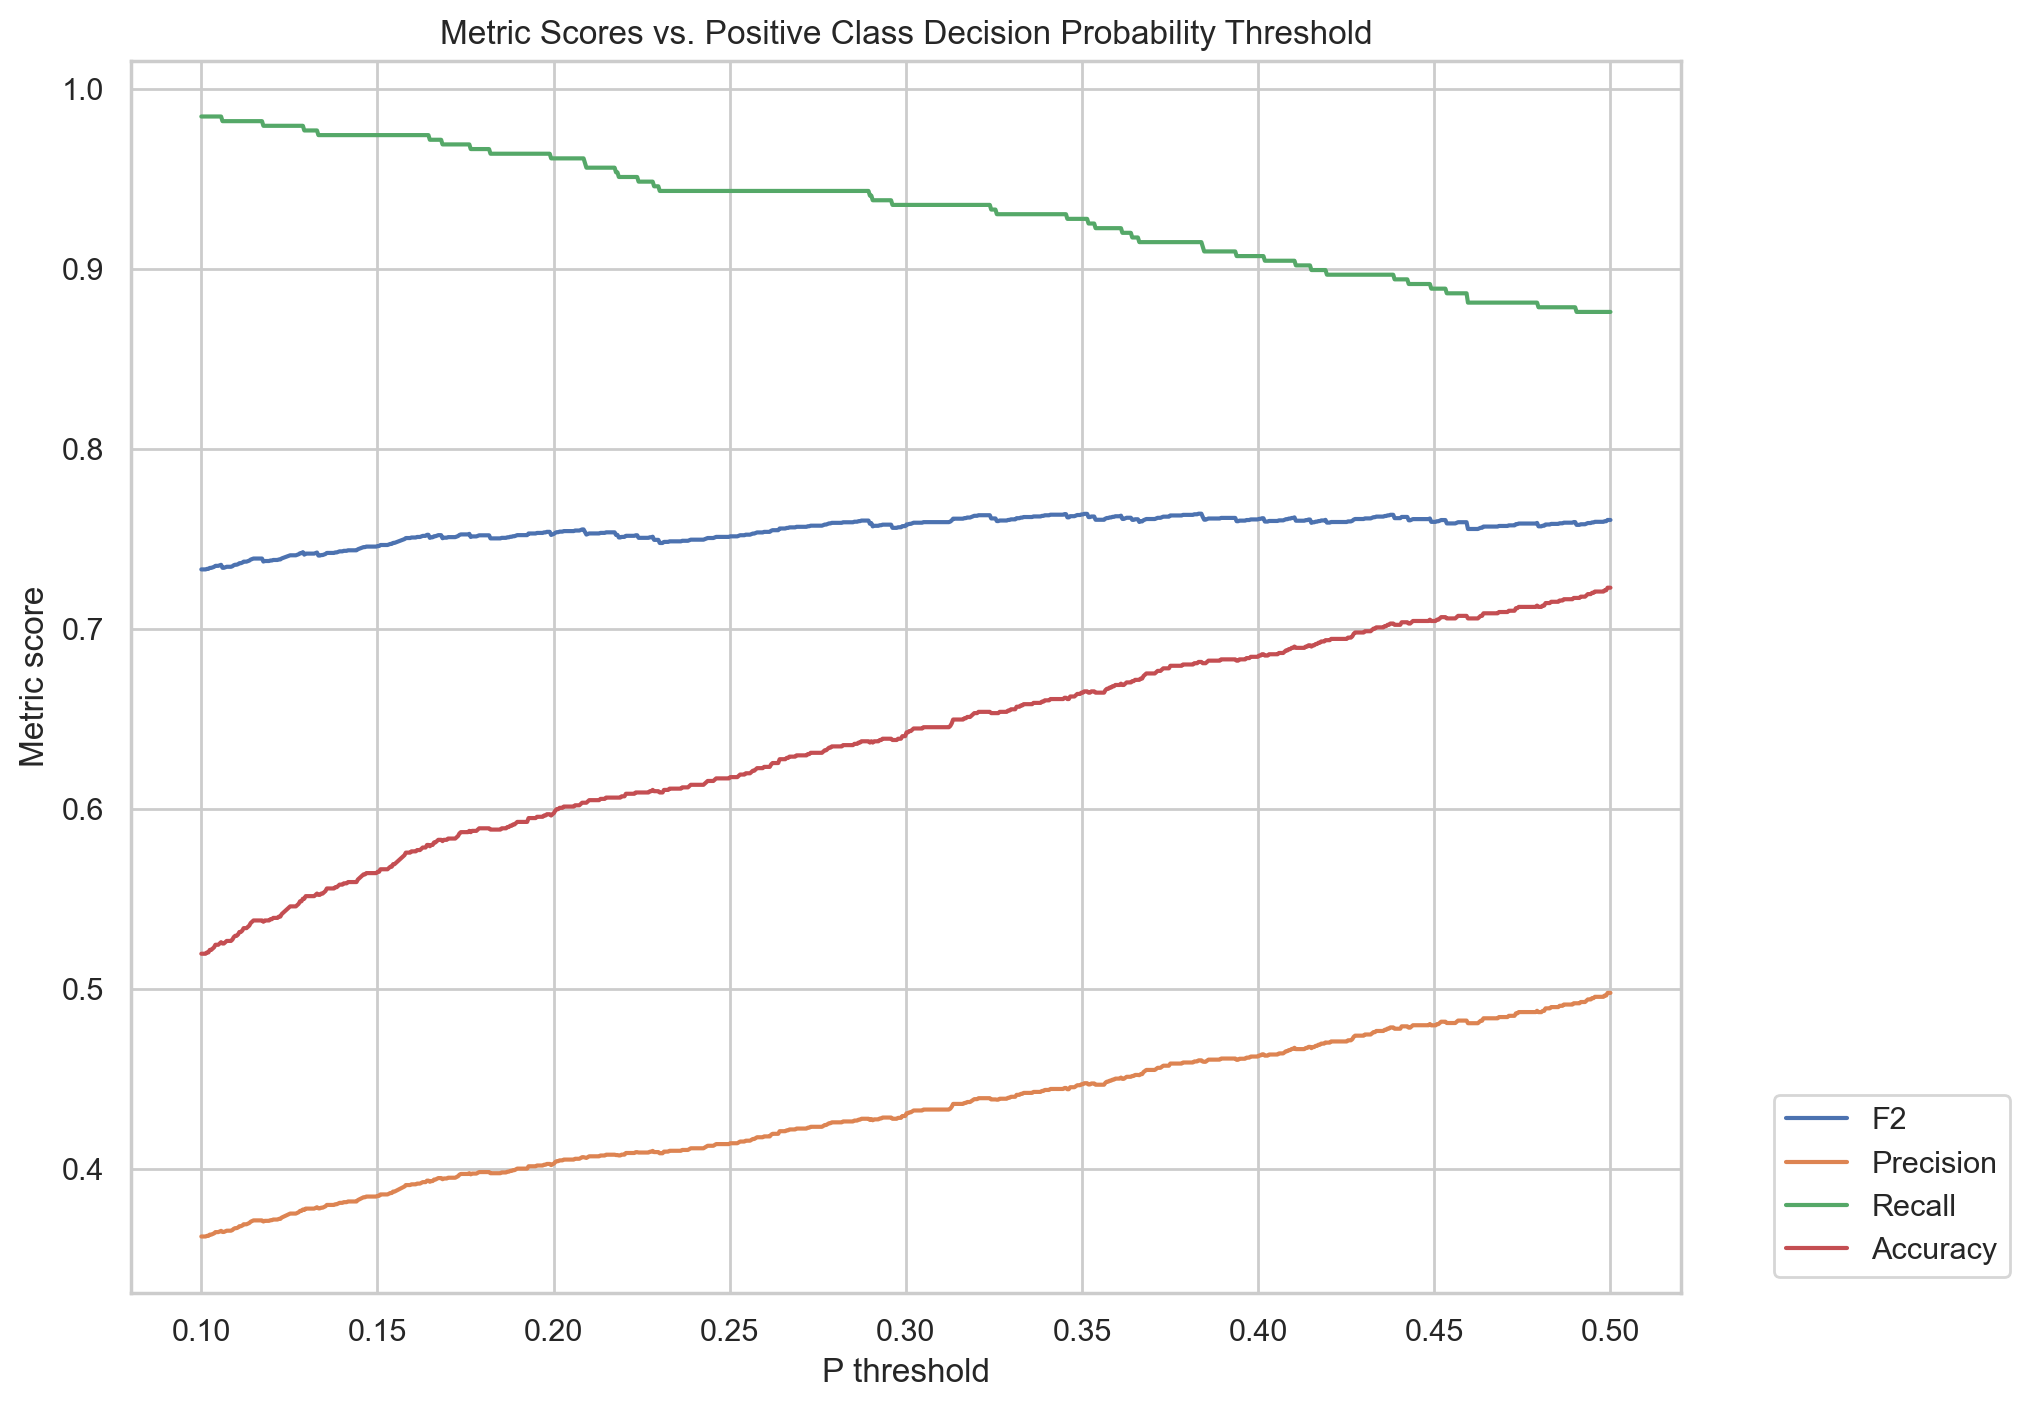

In [100]:

# X_val, y_val = X_te, y_te # explicitly calling this validation since we're using it for selection

thresh_ps = np.linspace(.10,.50,1000)
model_val_probs = ada_xgb.predict_proba(x_val)[:,1] # positive class probs, same basic logistic model we fit in section 2 

f2_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
for p in thresh_ps:
    model_val_labels = model_val_probs >= p
    f2_scores.append(fbeta_score(y_val, model_val_labels,beta=2 ))    
    prec_scores.append(precision_score(y_val, model_val_labels))
    rec_scores.append(recall_score(y_val, model_val_labels))
    acc_scores.append(accuracy_score(y_val, model_val_labels))

plt.figure(figsize=(10,8))
plt.plot(thresh_ps, f2_scores)
plt.plot(thresh_ps, prec_scores)
plt.plot(thresh_ps, rec_scores)
plt.plot(thresh_ps, acc_scores)

plt.title('Metric Scores vs. Positive Class Decision Probability Threshold')
plt.legend(['F2','Precision','Recall','Accuracy'], bbox_to_anchor=(1.05, 0), loc='lower left')
plt.xlabel('P threshold')
plt.ylabel('Metric score')

best_f2_score = np.max(f2_scores) 
best_thresh_p = thresh_ps[np.argmax(f2_scores)]

print('Logistic Regression Model best F2 score %.3f at prob decision threshold >= %.3f' 
      % (best_f2_score, best_thresh_p))

ADASYN XGBoost best test F2 score 0.734 at prob decision threshold >= 0.193


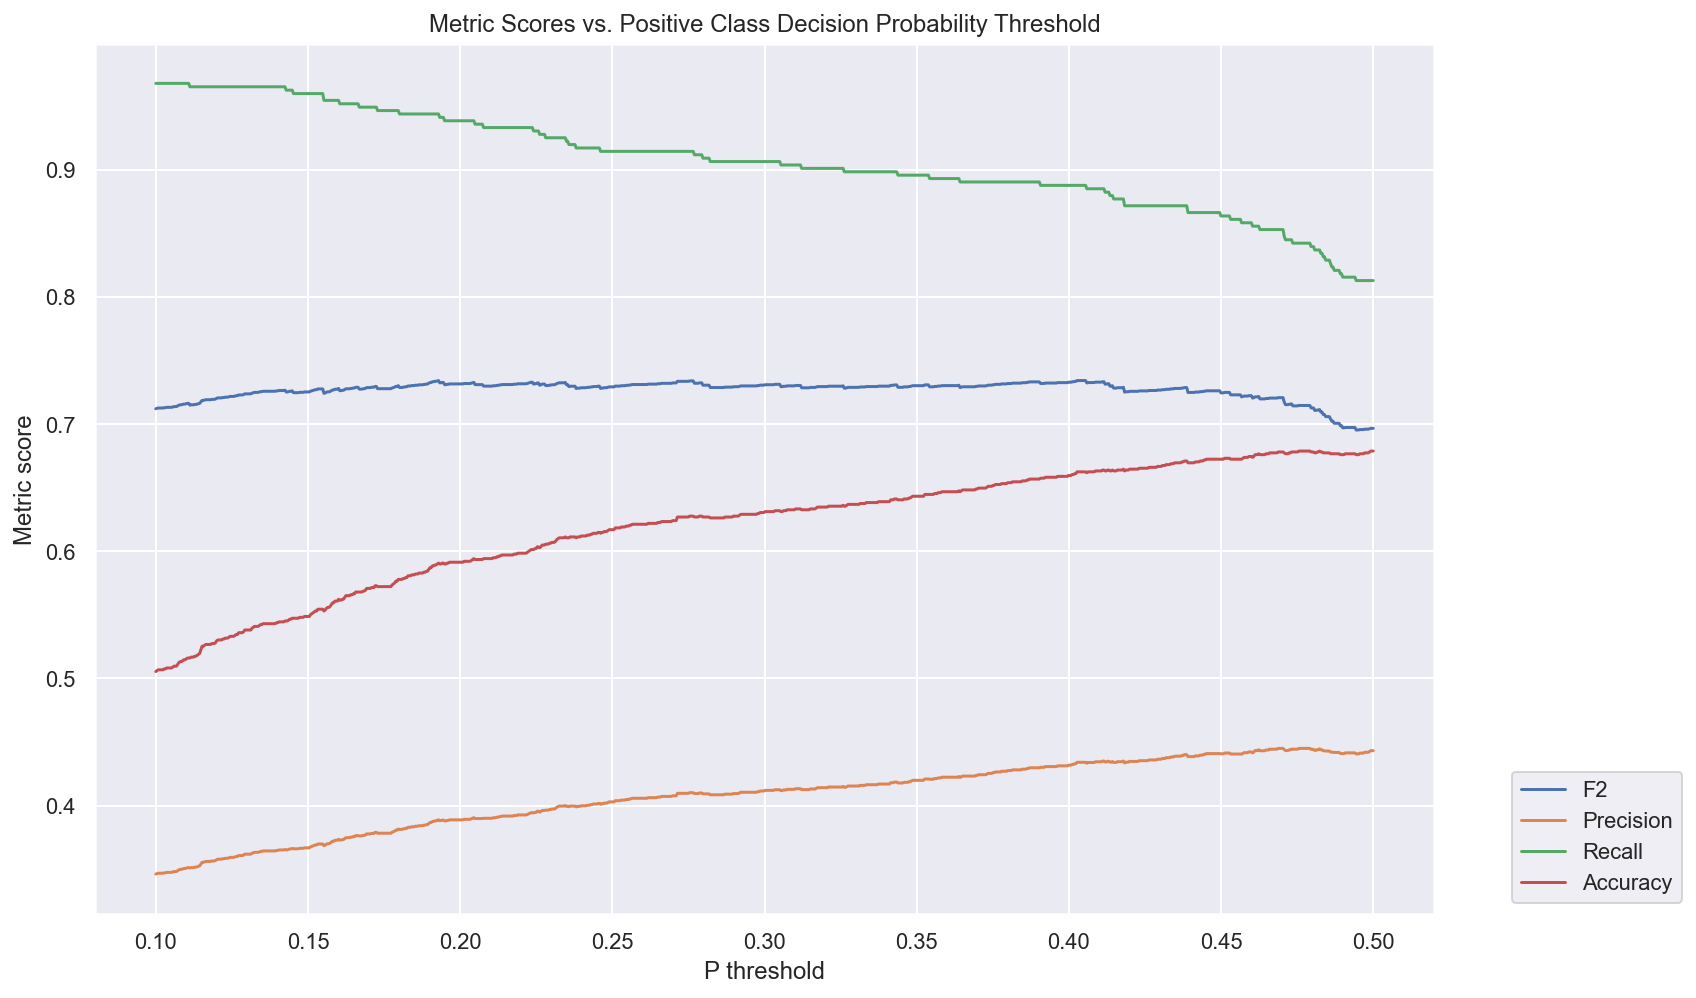

In [115]:

# X_val, y_val = X_te, y_te # explicitly calling this validation since we're using it for selection

thresh_ps = np.linspace(.10,.50,1000)
model_test_probs = ada_xgb.predict_proba(x_test)[:,1] # positive class probs, same basic logistic model we fit in section 2 

f2_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
for p in thresh_ps:
    model_test_labels = model_test_probs >= p
    f2_scores.append(fbeta_score(y_test, model_test_labels,beta=2 ))    
    prec_scores.append(precision_score(y_test, model_test_labels))
    rec_scores.append(recall_score(y_test, model_test_labels))
    acc_scores.append(accuracy_score(y_test, model_test_labels))

plt.figure(figsize=(12,8))
plt.plot(thresh_ps, f2_scores)
plt.plot(thresh_ps, prec_scores)
plt.plot(thresh_ps, rec_scores)
plt.plot(thresh_ps, acc_scores)

plt.title('Metric Scores vs. Positive Class Decision Probability Threshold')
plt.legend(['F2','Precision','Recall','Accuracy'], bbox_to_anchor=(1.05, 0), loc='lower left')
plt.xlabel('P threshold')
plt.ylabel('Metric score')

best_f2_score = np.max(f2_scores) 
best_thresh_p = thresh_ps[np.argmax(f2_scores)]

print('ADASYN XGBoost best test F2 score %.3f at prob decision threshold >= %.3f' 
      % (best_f2_score, best_thresh_p))

* ### Selected model is Random Forest

RF Hyper tunning

In [101]:
X = full_data.drop('Churn', axis=1)
y = full_data["Churn"]

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=42)

In [103]:
## First lets find optimal parameters
param_grid = {
    'n_estimators': [int(x) for x in np.linspace(60,130,8)],
    'max_features': ['sqrt'],
    'max_depth': [8, 10,12,15],
    'min_samples_split': [3,4,5],
    'min_samples_leaf': [2,4,6,8,10,12],
    'bootstrap': [True, False],
    }
# Output: 

rf_grid = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=param_grid,
    verbose=2, # NOTE: If you want to see what Grid Search is doing, set verbose=2
    n_jobs = 10,
    cv = 5)

rf_grid.fit(x_train, 
            y_train,) 

rf_grid.best_params_

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=60; total time=   0.3s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=60; total time=   0.3s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=60; total time=   0.3s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=60; total time=   0.3s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=60; total time=   0.3s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=80; total time=   0.4s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=70; total time=   0.

{'bootstrap': True,
 'max_depth': 8,
 'max_features': 'sqrt',
 'min_samples_leaf': 6,
 'min_samples_split': 5,
 'n_estimators': 110}

In [104]:
test_preds=rf_grid.predict(x_test)


print(f'Val Recall score: {recall_score(y_test, test_preds)} ')
print(f'Val F2 score: {fbeta_score(y_test, test_preds,beta=2)} ')
print('')
print(' val confusion_matrix:')
confusion_matrix(y_test, test_preds)

Val Recall score: 0.45187165775401067 
Val F2 score: 0.48120728929384965 

 val confusion_matrix:


array([[942,  91],
       [205, 169]])

### we go ahead and find our thresh hold with the adjustment

In [113]:
rf_grid.predict_proba(x_test)[:,1] >= 0.5

array([False, False,  True, ..., False, False, False])

Final RF Model best test F2 score 0.745 at prob decision threshold >= 0.147


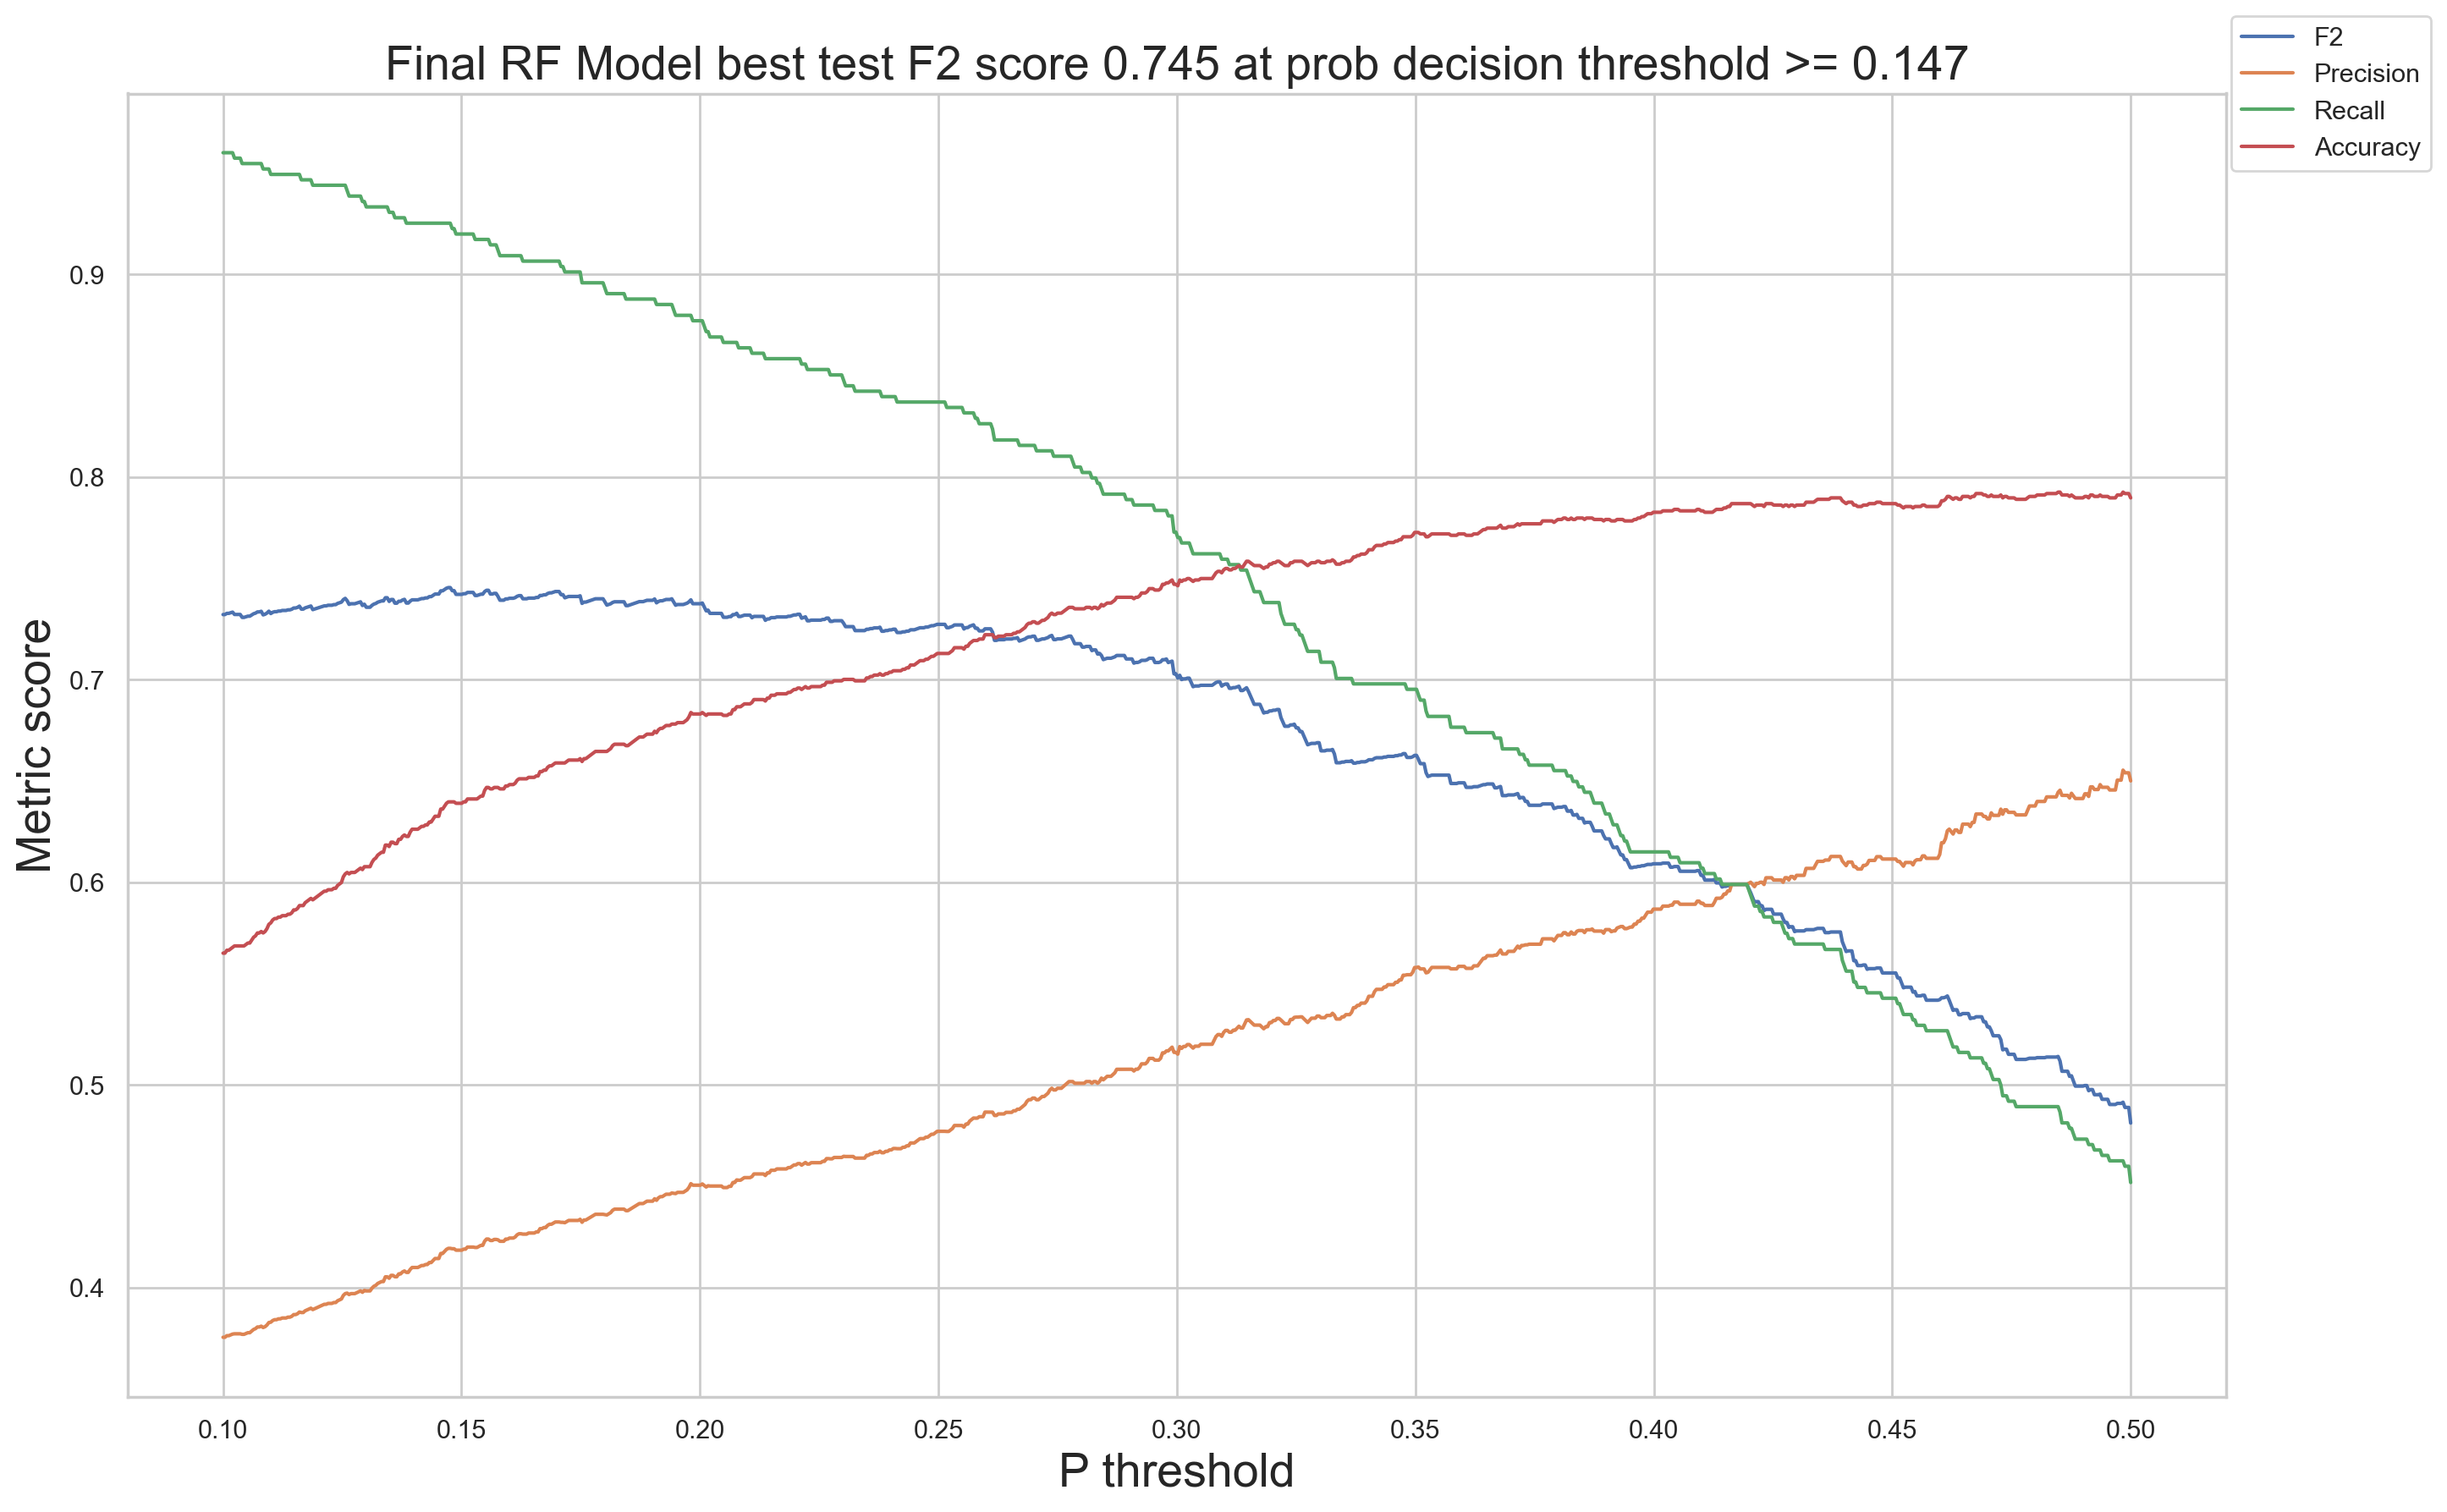

In [114]:

# X_val, y_val = X_te, y_te # explicitly calling this validation since we're using it for selection

thresh_ps = np.linspace(.10,.50,1000)
model_test_probs = rf_grid.predict_proba(x_test)[:,1] # positive class probs, same basic logistic model we fit in section 2 

f2_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
for p in thresh_ps:
    model_test_labels = model_test_probs >= p
    f2_scores.append(fbeta_score(y_test, model_test_labels,beta=2 ))    
    prec_scores.append(precision_score(y_test, model_test_labels))
    rec_scores.append(recall_score(y_test, model_test_labels))
    acc_scores.append(accuracy_score(y_test, model_test_labels))

best_f2_score = np.max(f2_scores) 
best_thresh_p = thresh_ps[np.argmax(f2_scores)]

plt.figure(figsize=(16,10))
plt.plot(thresh_ps, f2_scores)
plt.plot(thresh_ps, prec_scores)
plt.plot(thresh_ps, rec_scores)
plt.plot(thresh_ps, acc_scores)

plt.title('Final RF Model best test F2 score %.3f at prob decision threshold >= %.3f' 
      % (best_f2_score, best_thresh_p), fontdict={'size': 20})
plt.legend(['F2','Precision','Recall','Accuracy'], bbox_to_anchor=(1.05, 1), loc='center')
plt.xlabel('P threshold', fontdict={'size': 20})
plt.ylabel('Metric score',fontdict={'size': 20})
# plt.savefig('./pics/rf_final.png')


print('Final RF Model best test F2 score %.3f at prob decision threshold >= %.3f' 
      % (best_f2_score, best_thresh_p))

In [106]:
# lets save our model
import pickle as pkl
with open("../models/rf_model.pkl", "wb") as f:
    pkl.dump(rf_grid, f)

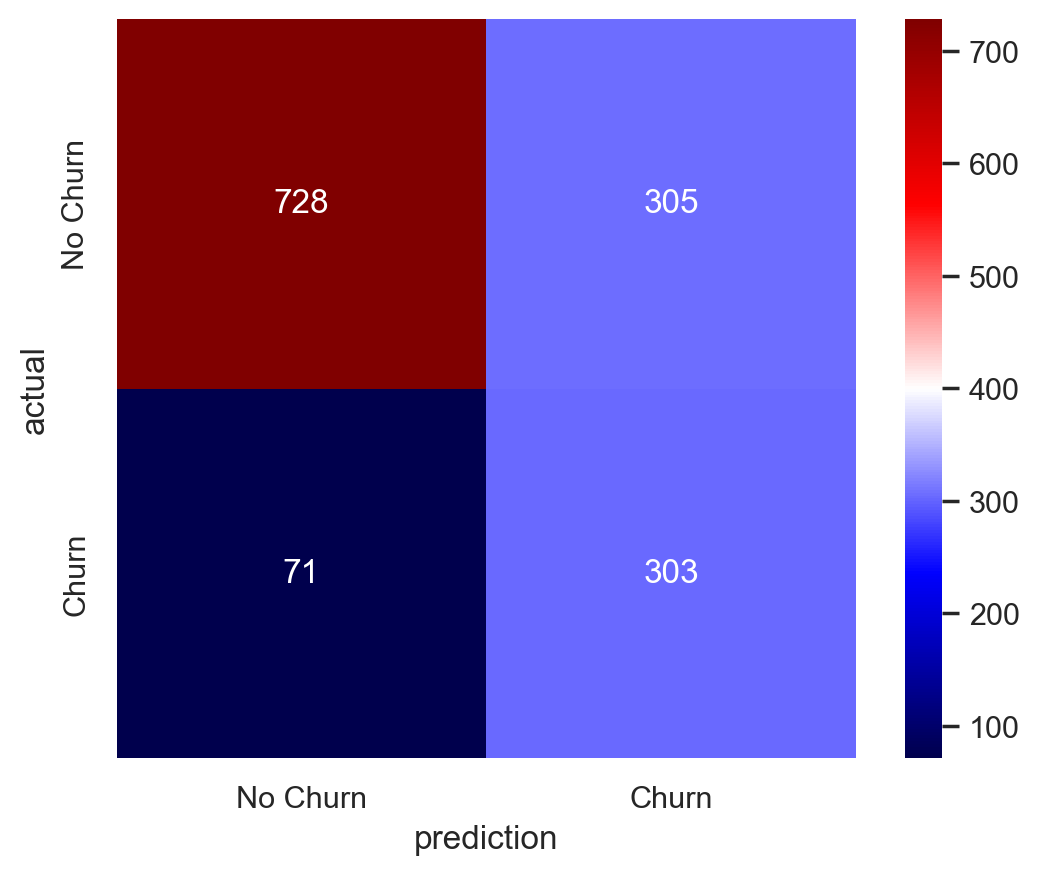

In [117]:
def make_confusion_matrix(model, threshold=0.275):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict_proba = (model.predict_proba(x_test)[:, 1] >= threshold)
    y_predict = model.predict(x_test)
    default_confusion = confusion_matrix(y_test, y_predict_proba)
    plt.figure(dpi=100)
    sns.heatmap(default_confusion, cmap='seismic', annot=True, square=True, fmt='d',
           xticklabels=['No Churn', 'Churn'],
           yticklabels=['No Churn', 'Churn']);
    plt.xlabel('prediction')
    plt.ylabel('actual')
    # plt.savefig('./pics/cmat.png')

make_confusion_matrix(rf_grid)

In [127]:
with open("../models/rf_model.pkl", "rb") as f:
    rf_model1 = pkl.load(f)

In [135]:
x_test

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2476,1,61,25.00,1501.75,1,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0
6773,0,19,24.70,465.85,0,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0
6116,0,13,102.25,1359.00,1,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0
3047,0,37,55.05,2030.75,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4092,0,6,29.45,161.45,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1728,0,1,19.05,19.05,1,0,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1
5241,0,12,94.55,1173.55,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
5456,0,26,56.05,1553.20,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1
5842,1,35,110.80,3836.30,0,0,0,1,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,1,0,1,0,0,0


In [179]:
rf_model1.predict([x_test.iloc[1].values])

array([0])

In [180]:
rf_model1.predict_proba([x_test.iloc[1].values])[:,1]

array([0.04275382])

In [136]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7028,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7029,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7030,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [179]:
[col for col in data.columns]

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [180]:
[col for col in x_test.columns]

['SeniorCitizen',
 'tenure',
 'MonthlyCharges',
 'TotalCharges',
 'gender_Male',
 'Partner_Yes',
 'Dependents_Yes',
 'PhoneService_Yes',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes',
 'Contract_One year',
 'Contract_Two year',
 'PaperlessBilling_Yes',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check']

In [181]:
[col for col in x_train.columns]

['SeniorCitizen',
 'tenure',
 'MonthlyCharges',
 'TotalCharges',
 'gender_Male',
 'Partner_Yes',
 'Dependents_Yes',
 'PhoneService_Yes',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes',
 'Contract_One year',
 'Contract_Two year',
 'PaperlessBilling_Yes',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check']

In [200]:
x_test.iloc[2]

SeniorCitizen                               0.00
tenure                                     13.00
MonthlyCharges                            102.25
TotalCharges                             1359.00
gender_Male                                 1.00
Partner_Yes                                 1.00
Dependents_Yes                              0.00
PhoneService_Yes                            1.00
MultipleLines_No phone service              0.00
MultipleLines_Yes                           1.00
InternetService_Fiber optic                 1.00
InternetService_No                          0.00
OnlineSecurity_No internet service          0.00
OnlineSecurity_Yes                          0.00
OnlineBackup_No internet service            0.00
OnlineBackup_Yes                            0.00
DeviceProtection_No internet service        0.00
DeviceProtection_Yes                        1.00
TechSupport_No internet service             0.00
TechSupport_Yes                             0.00
StreamingTV_No inter

In [199]:
rf_model1.predict_proba([x_test.iloc[2]])[:, 1] 

array([0.62363465])

Counter({0: 1033, 1: 374})

In [212]:
a = [{'a':1, 'b':2, 'c':5}]

In [213]:
b = pd.DataFrame(a)'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                                         'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
                                         'PaymentMethod', 'tenure']

In [225]:
gk = ['SeniorCitizen', 'MonthlyCharges', 'TotalCharges',
      'gender', 'Partner', 'Dependents', 'PhoneService', 
      'MultipleLines', 'InternetService','OnlineSecurity', 
      'OnlineBackup', 'DeviceProtection', 'TechSupport',
      'StreamingTV', 'StreamingMovies', 'Contract', 
      'PaperlessBilling', 'PaymentMethod', 'tenure']

In [227]:
gk

['SeniorCitizen',
 'MonthlyCharges',
 'TotalCharges',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'tenure']

In [181]:
d ={'gender': 'Male', 'SeniorCitizen': 1, 'Partner': 'Yes', 'Dependents': 'Yes', 'tenure': 0, 'PhoneService': 'yes', 'MultipleLines': 'Yes', 'InternetService': 'Yes', 'OnlineSecurity': 'Yes', 'OnlineBackup': 'Yes', 'DeviceProtection': 'Yes', 'TechSupport': 'Yes', 'StreamingTV': 'Yes', 'StreamingMovies': 'Yes', 'Contract': 'Yes', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Visa', 'MonthlyCharges': 40.0, 'TotalCharges': 100.0}

In [160]:
d.values()

dict_values(['Male', 1, 'Yes', 'Yes', 0, 'yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Visa', 40.0, 100.0])

In [155]:
d = {'g': 1, 'p':2}

In [182]:
nd = pd.DataFrame.from_dict([d])
nd

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Male,1,Yes,Yes,0,yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Visa,40.0,100.0


In [177]:
ndf = pd.get_dummies(nd)
ndf

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_yes,MultipleLines_Yes,InternetService_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_Yes,PaperlessBilling_Yes,PaymentMethod_Visa
0,1,0,40.0,100.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [178]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1407 entries, 2476 to 3977
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          1407 non-null   int64  
 1   tenure                                 1407 non-null   int64  
 2   MonthlyCharges                         1407 non-null   float64
 3   TotalCharges                           1407 non-null   float64
 4   gender_Male                            1407 non-null   uint8  
 5   Partner_Yes                            1407 non-null   uint8  
 6   Dependents_Yes                         1407 non-null   uint8  
 7   PhoneService_Yes                       1407 non-null   uint8  
 8   MultipleLines_No phone service         1407 non-null   uint8  
 9   MultipleLines_Yes                      1407 non-null   uint8  
 10  InternetService_Fiber optic            1407 non-null   uint8  
 11  I